# Matching on Occupations

### a. Install packages and read in data

In [ ]:
# install.packages(c('Matching', 'rgenoud', 'ggplot2', 'cobalt'))

library(Matching)
library(rgenoud)
library(ggplot2)
library(cobalt)

Loading required package: MASS

## 
##  Matching (Version 4.10-2, Build Date: 2022-04-13)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


##  rgenoud (Version 5.9-0.3, Build Date: 2022-04-19)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##


 cobalt (Version 4.3.2, Build Date: 2022-01-19)



In [ ]:
# read in data
accountant = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/accountant.csv')
copywriter = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/copywriter.csv')
designer = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/designer.csv')
marketer = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/marketer.csv')
swe = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/software_engineer.csv')
translator = read.csv('/work/DS4SG-Gender-Inequality/data/processed/occupation/translator.csv')

### b. Randomly sample 1000 data points for testing

In [ ]:
# sample = df[sample(nrow(df), 1000), ]
# head(sample)

### c. Matching for accountants

In [ ]:
attach(accountant)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)



Thu Apr 21 20:17:04 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	7
	(2) Uniform Mutation.................. 	8
	(3) Boundary Mutation................. 	8


                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    2     -none- character
AMsmallestVarNumber  2     -none- numeric  

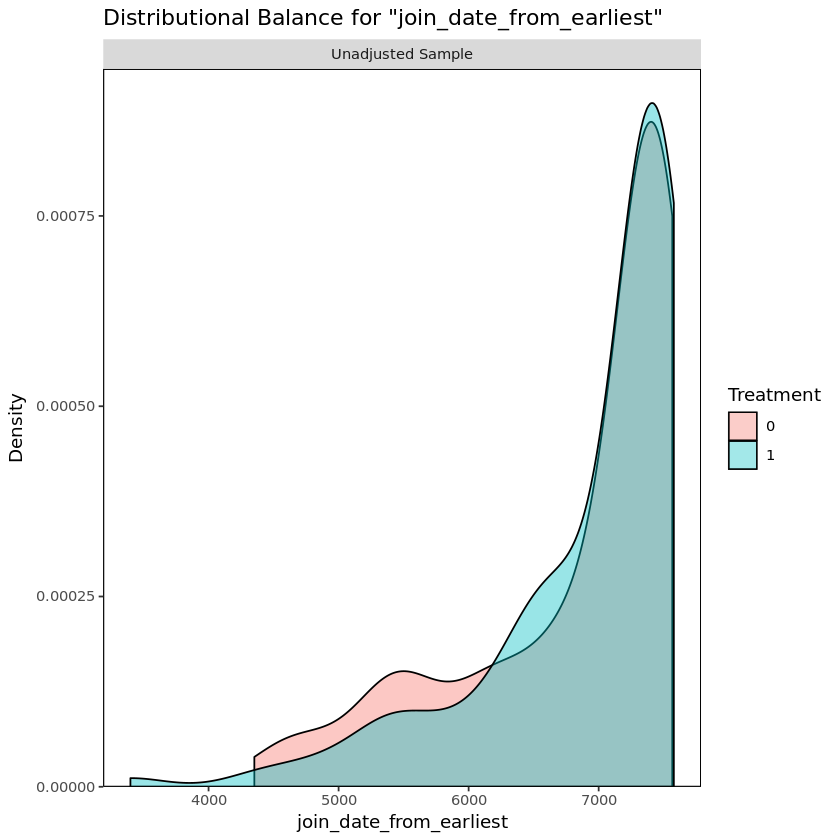

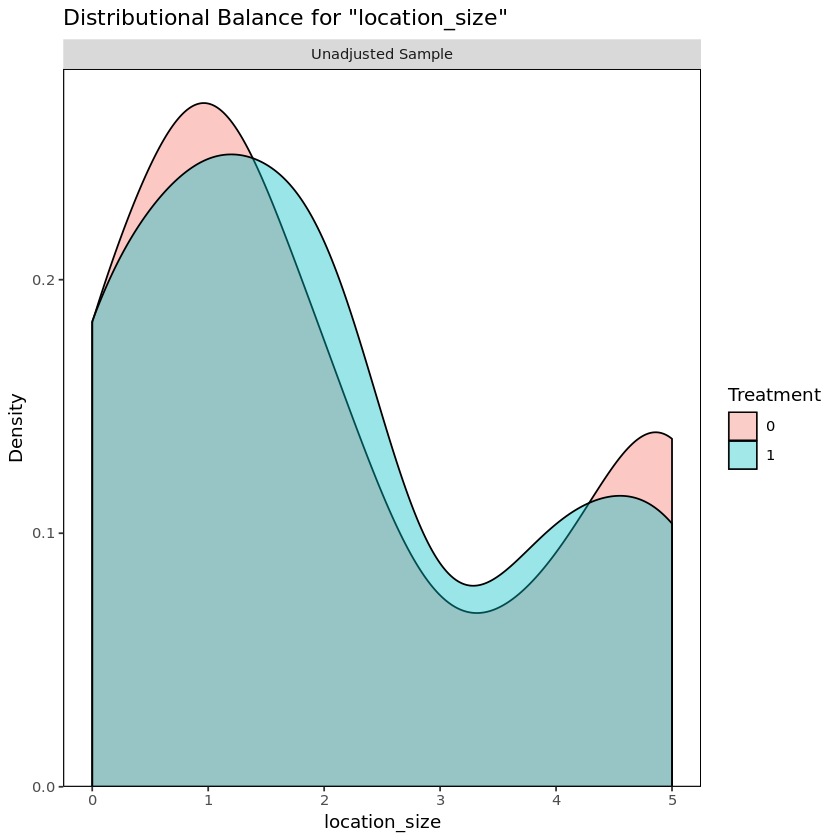

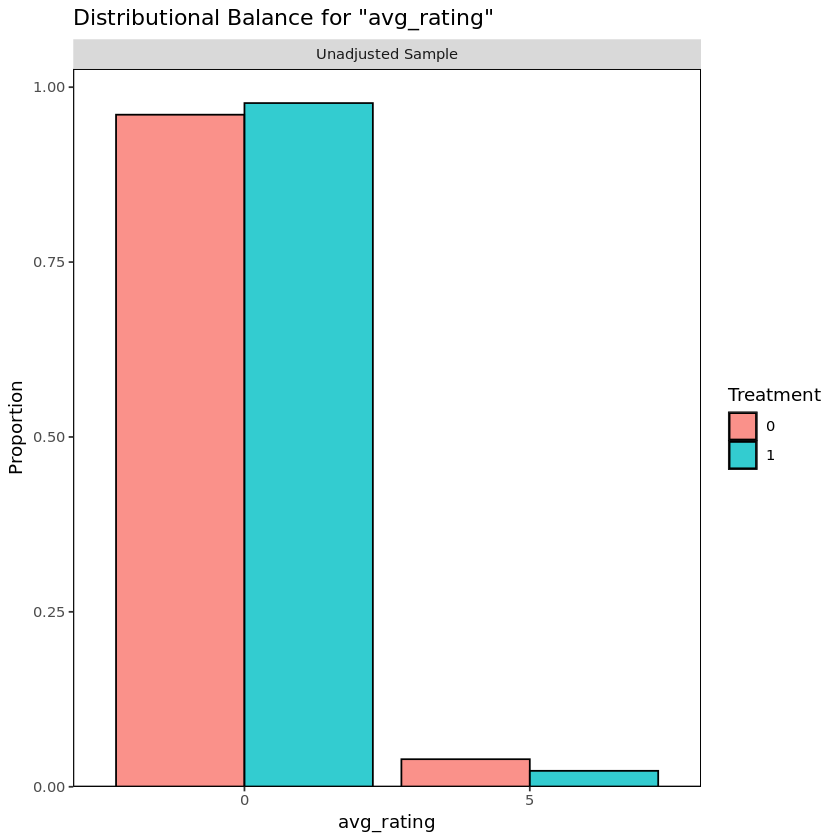

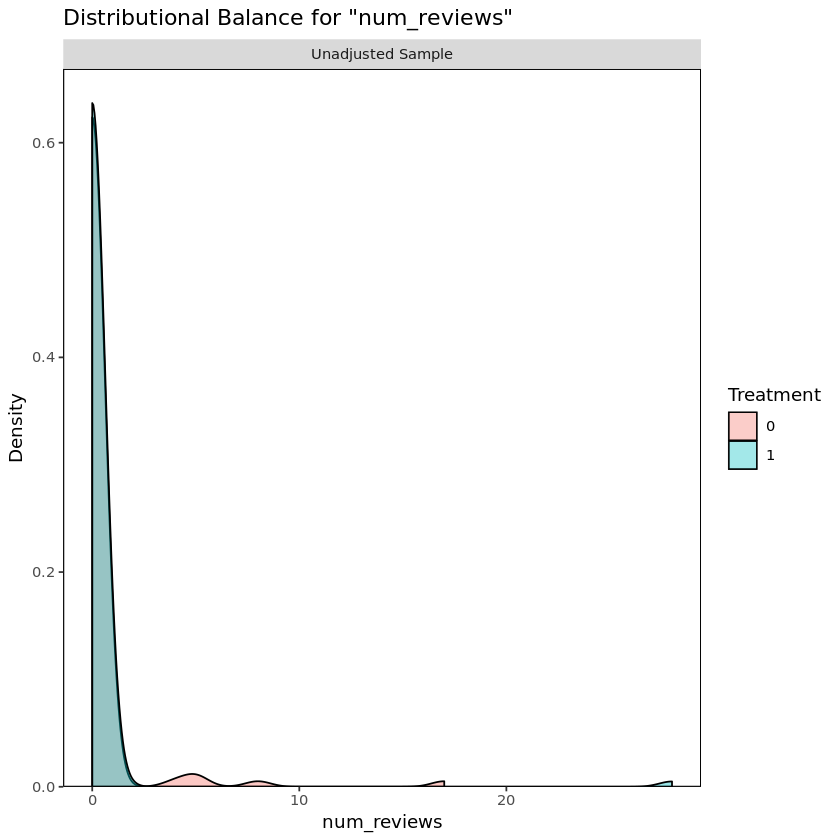

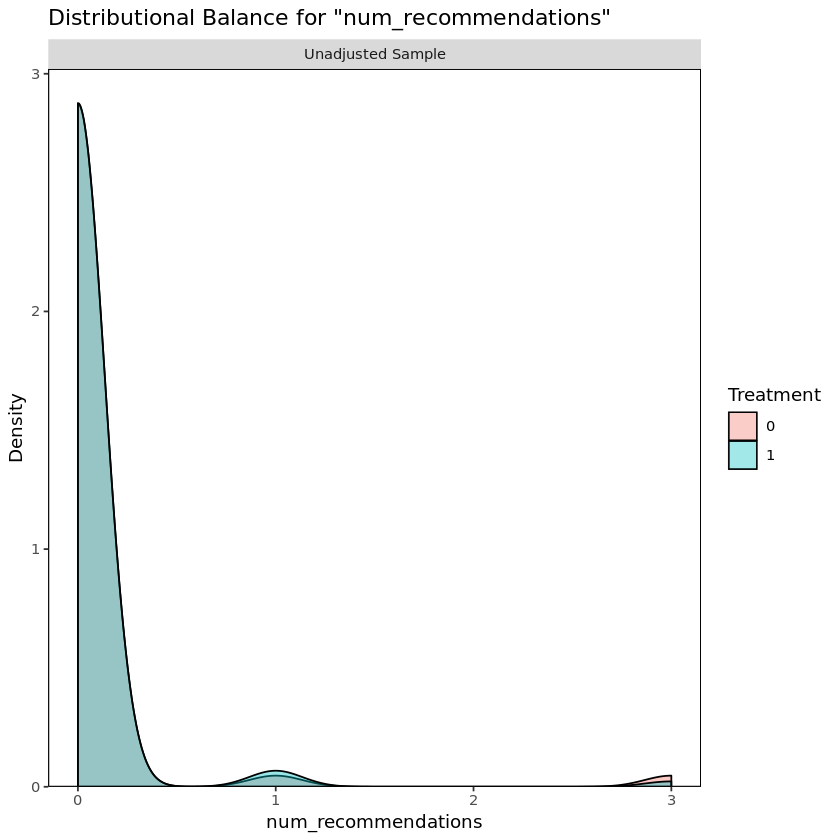

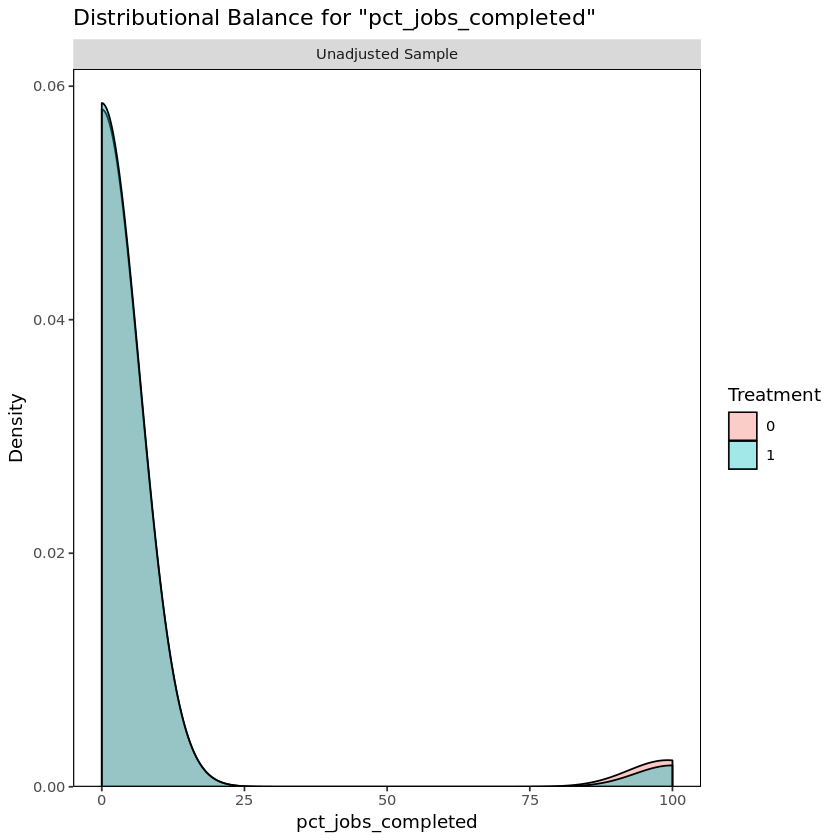

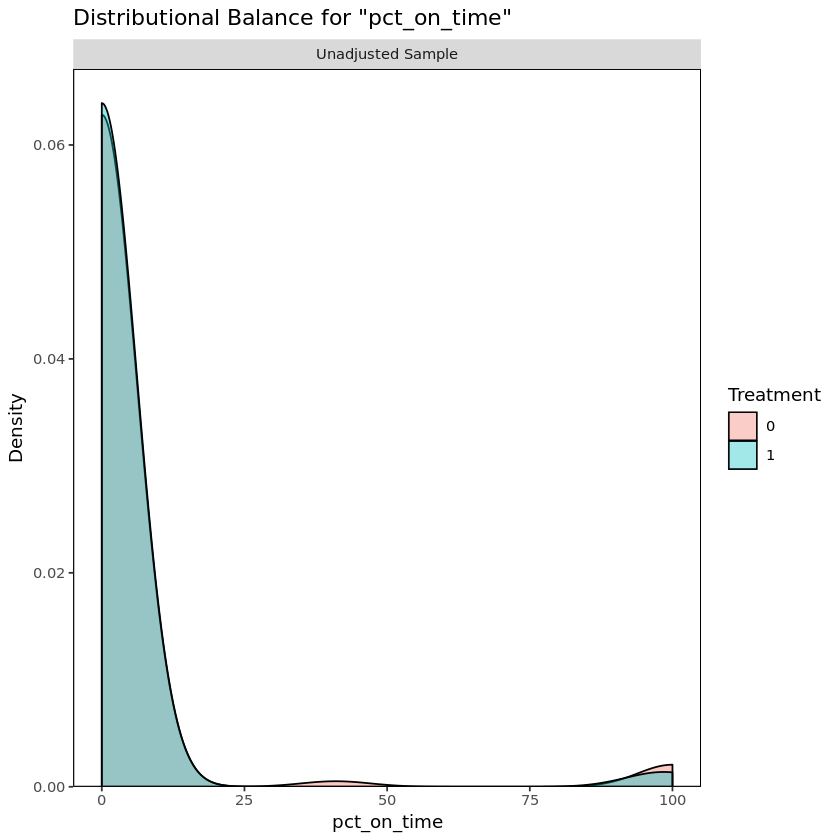

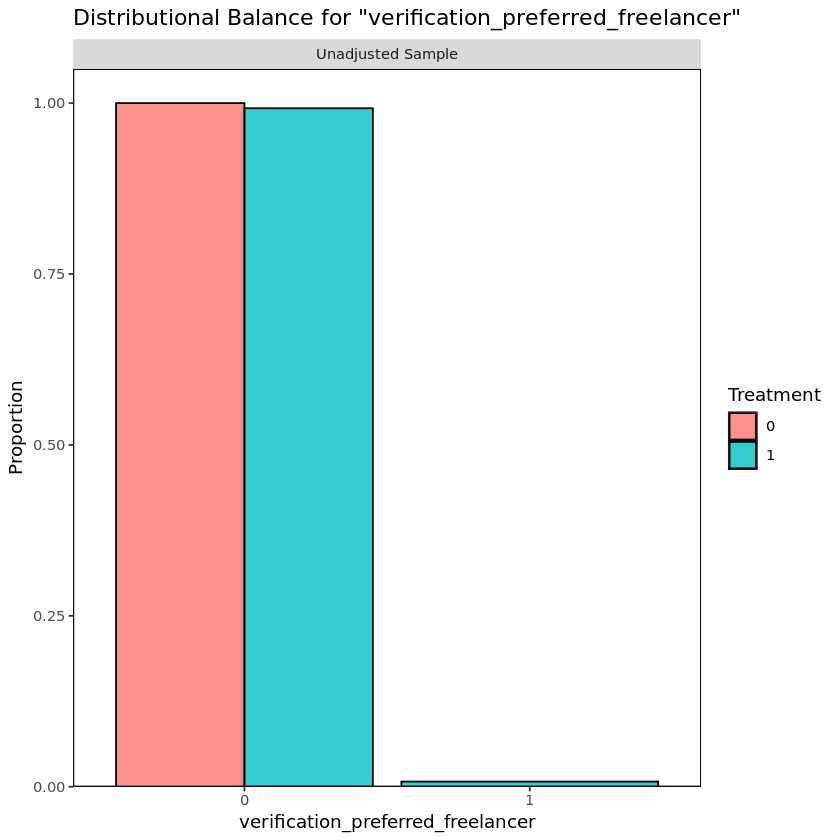

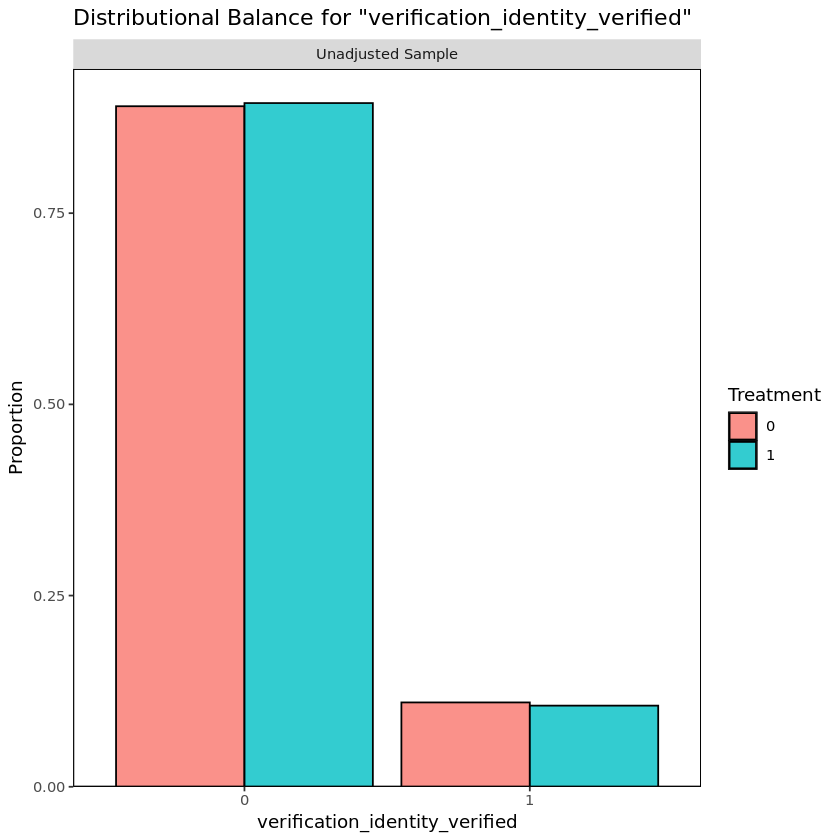

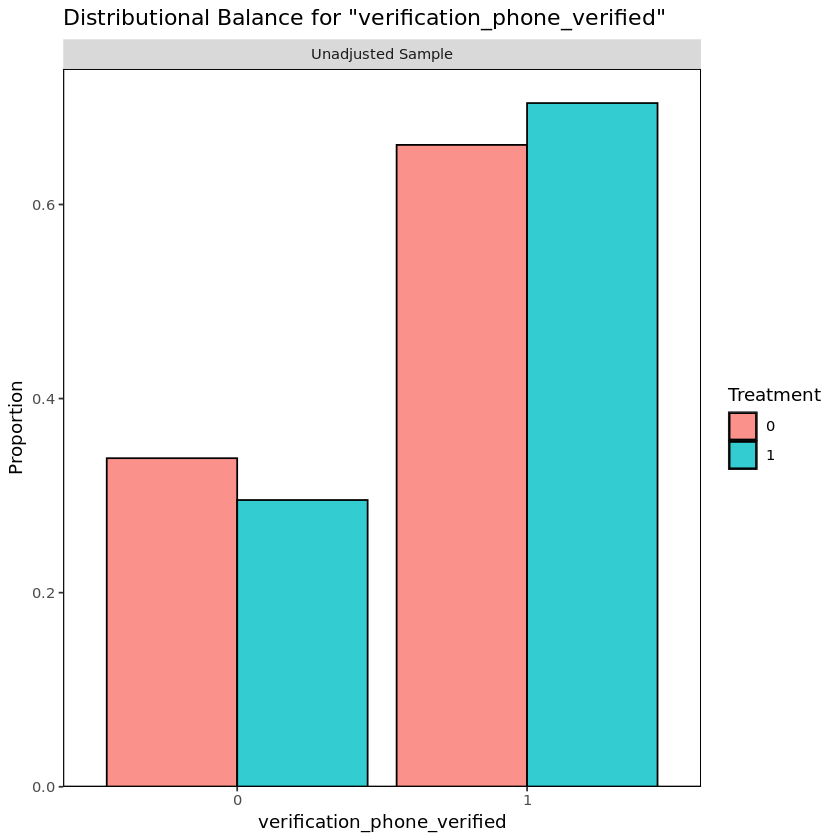

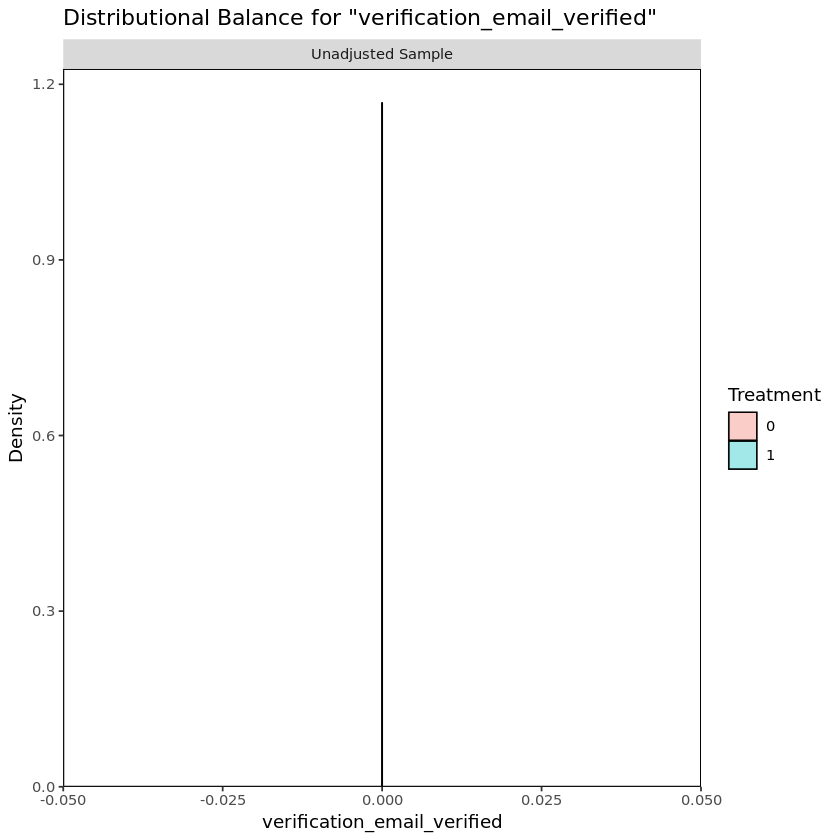

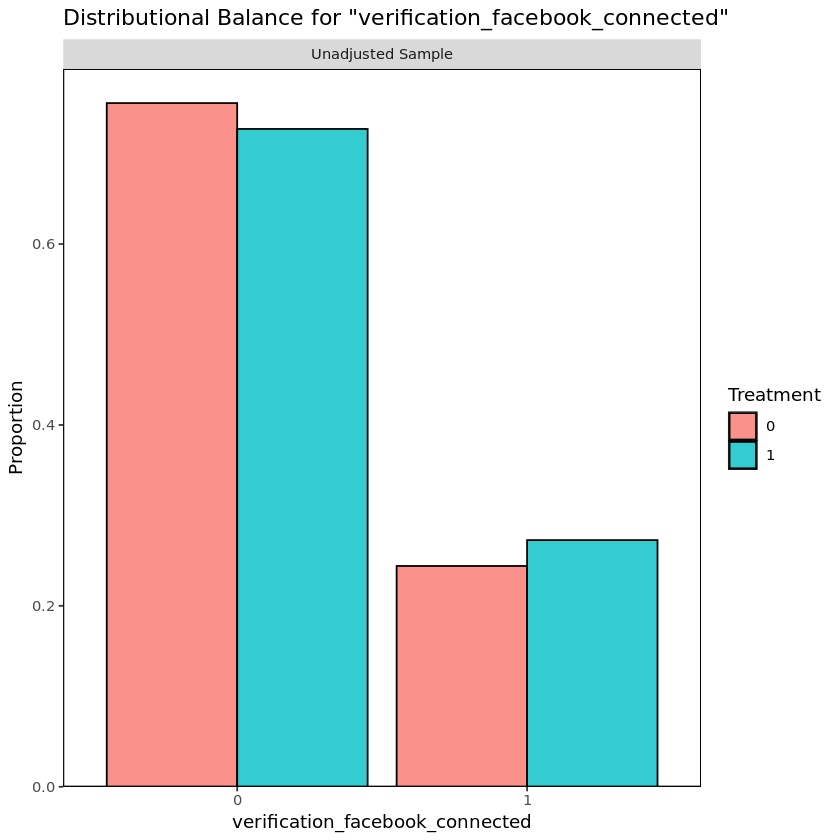

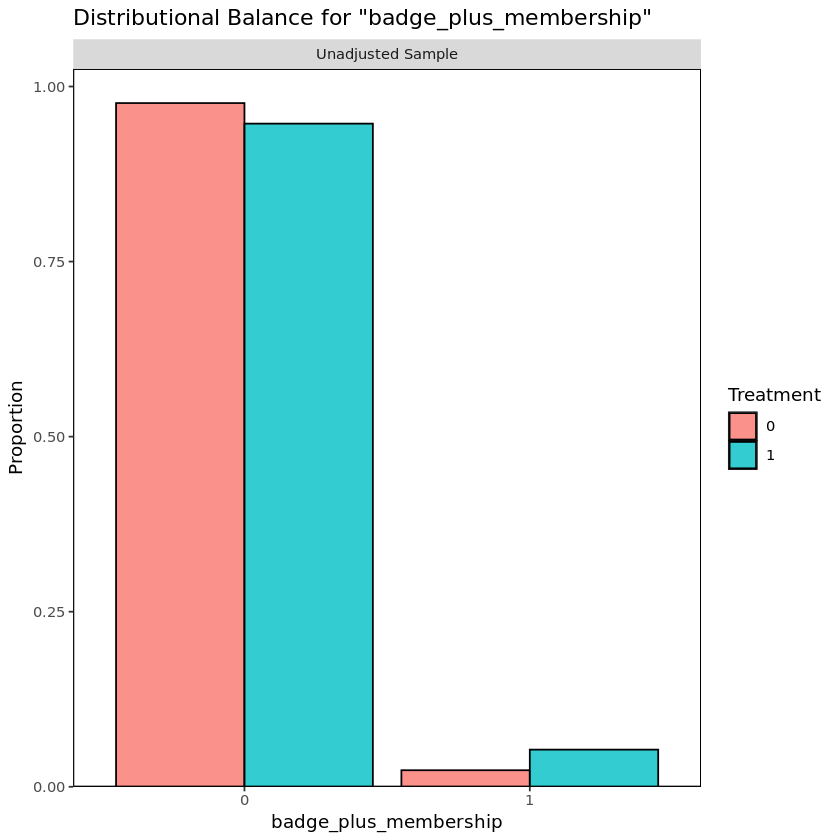

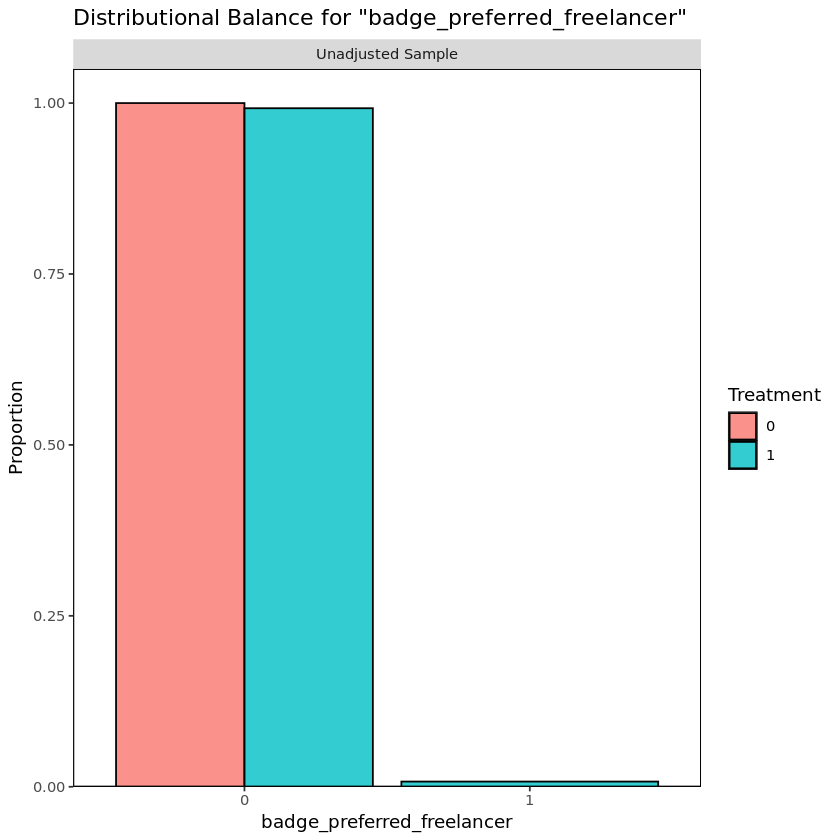

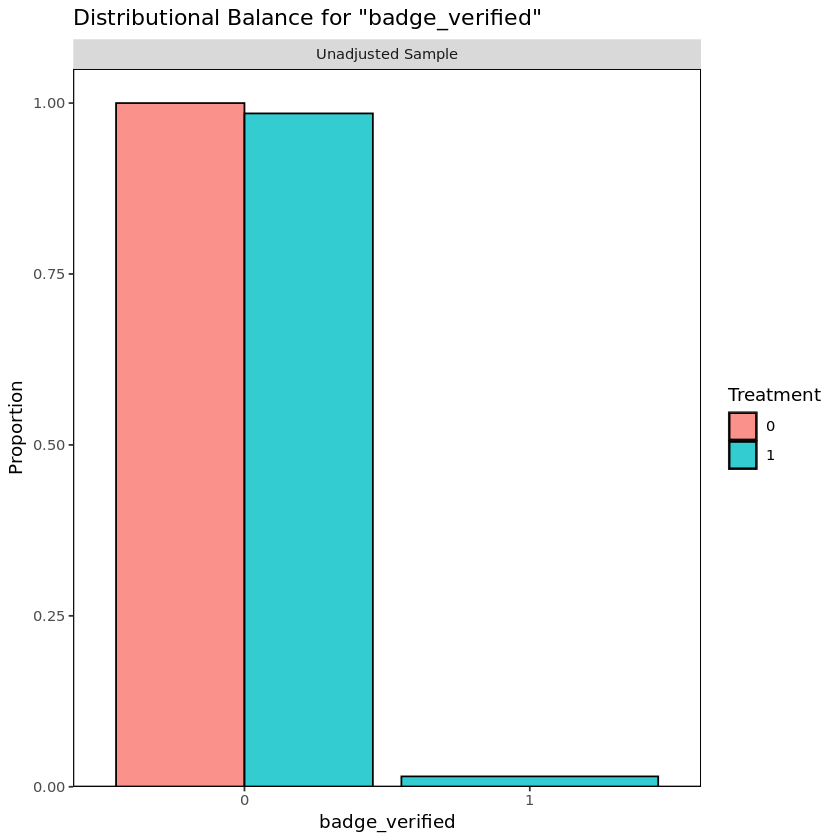

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=accountant, var.name=c))
}  

### d. Matching for copywriters

In [ ]:
attach(copywriter)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)

The following objects are masked from accountant:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills




Thu 

                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    2     -none- character
AMsmallestVarNumber  2     -none- numeric  

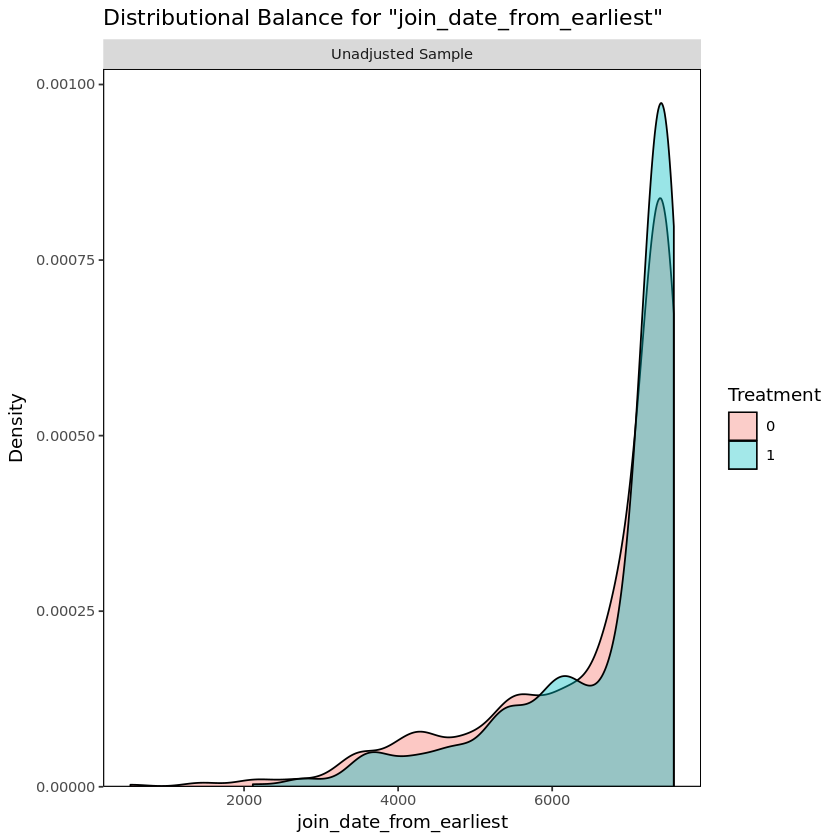

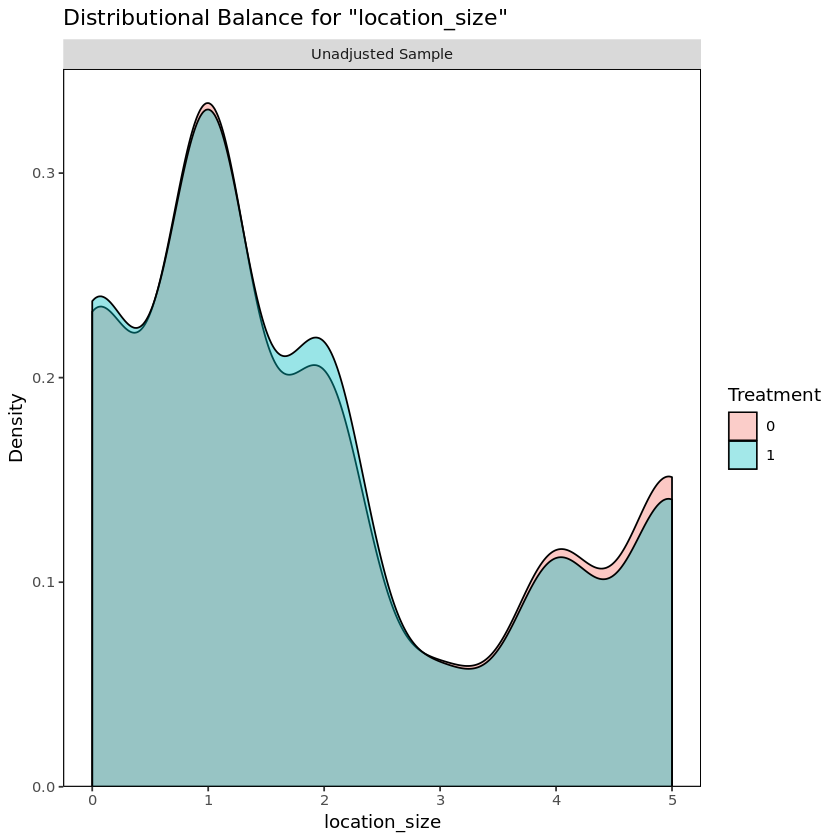

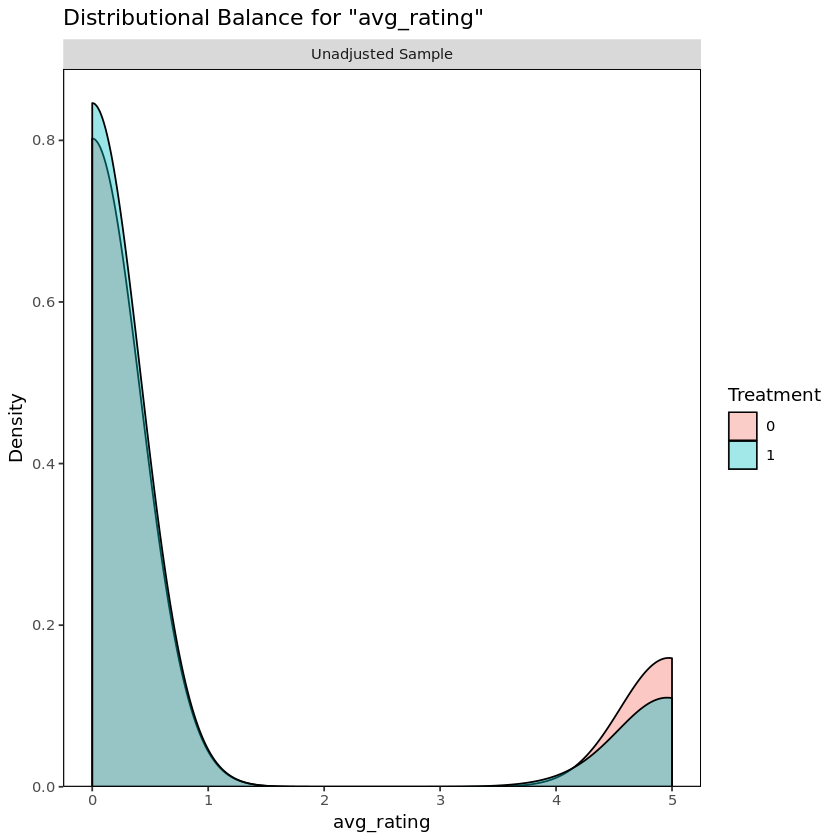

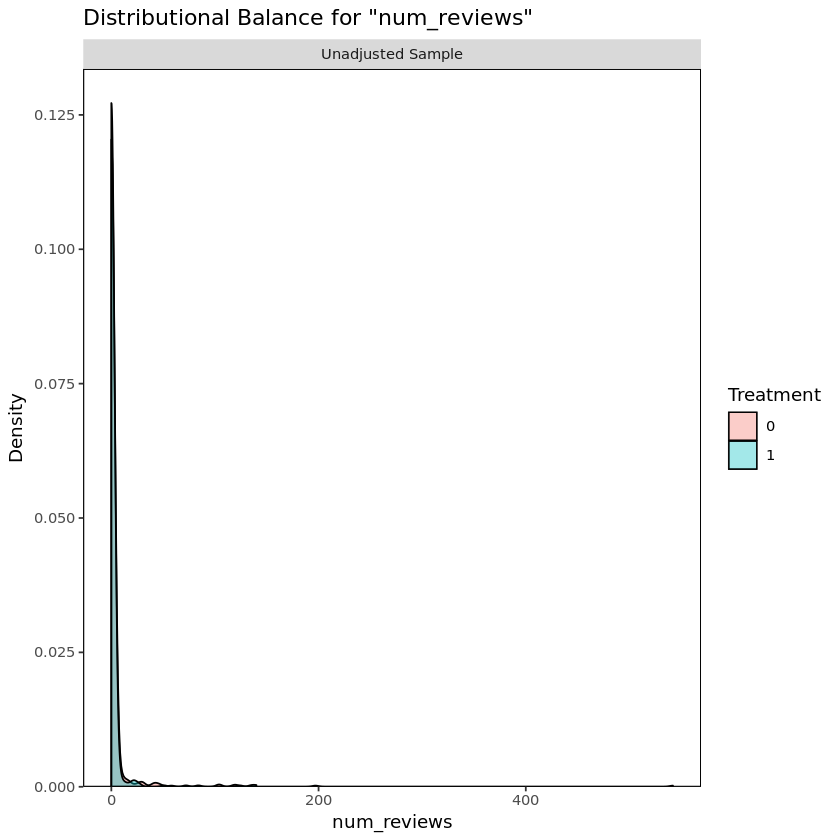

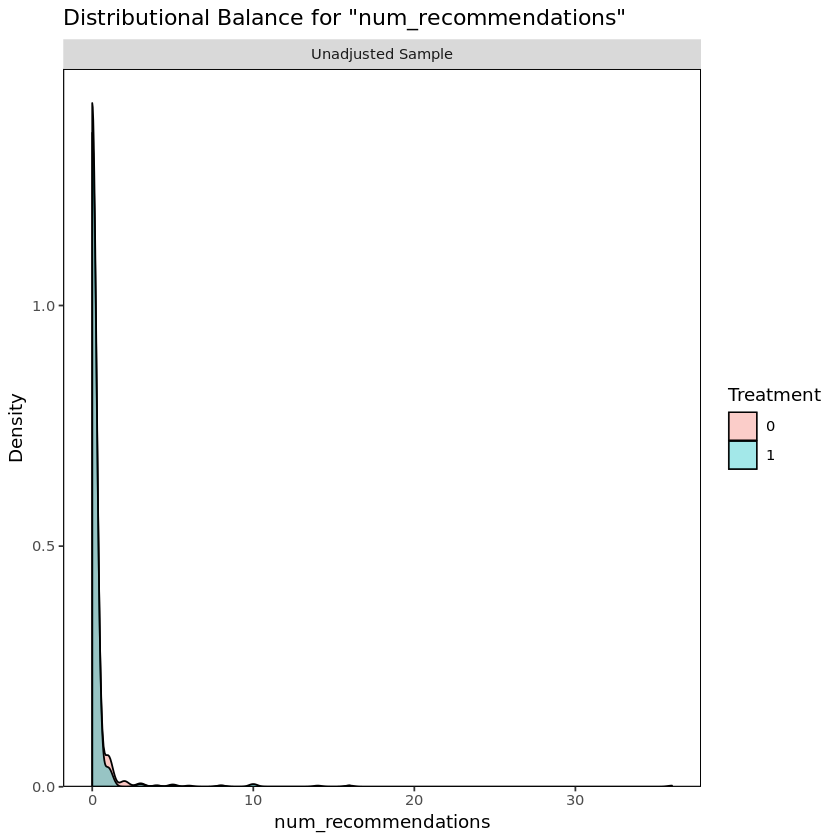

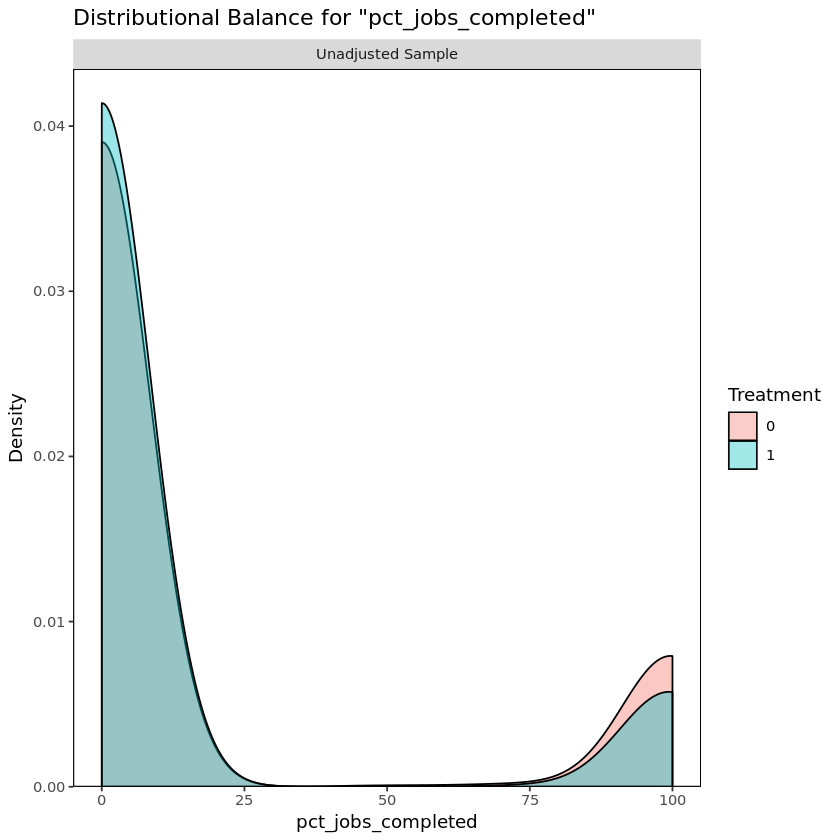

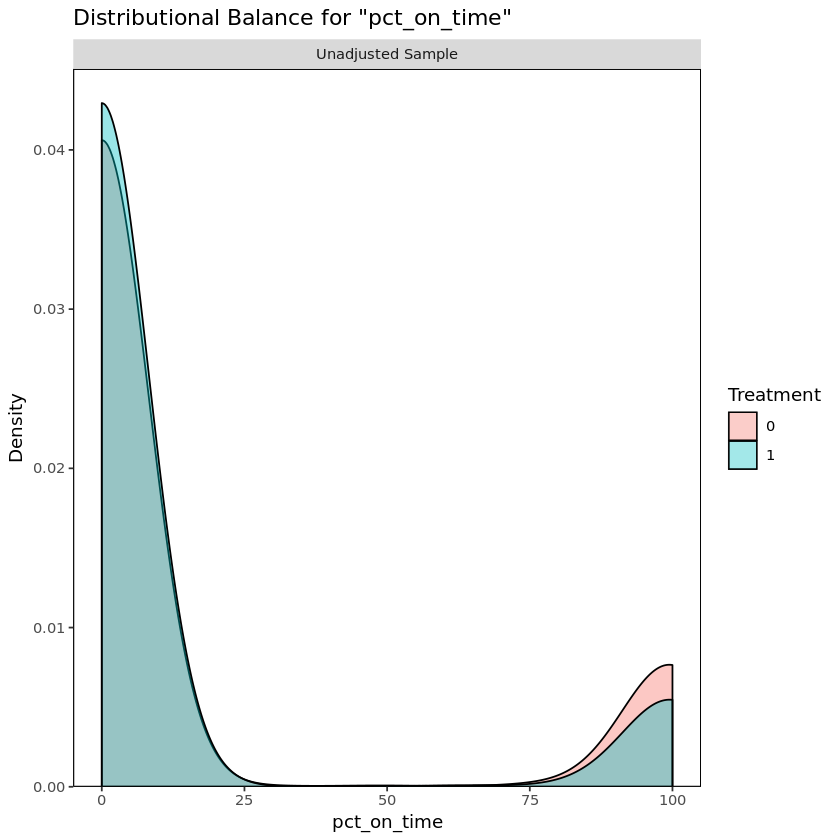

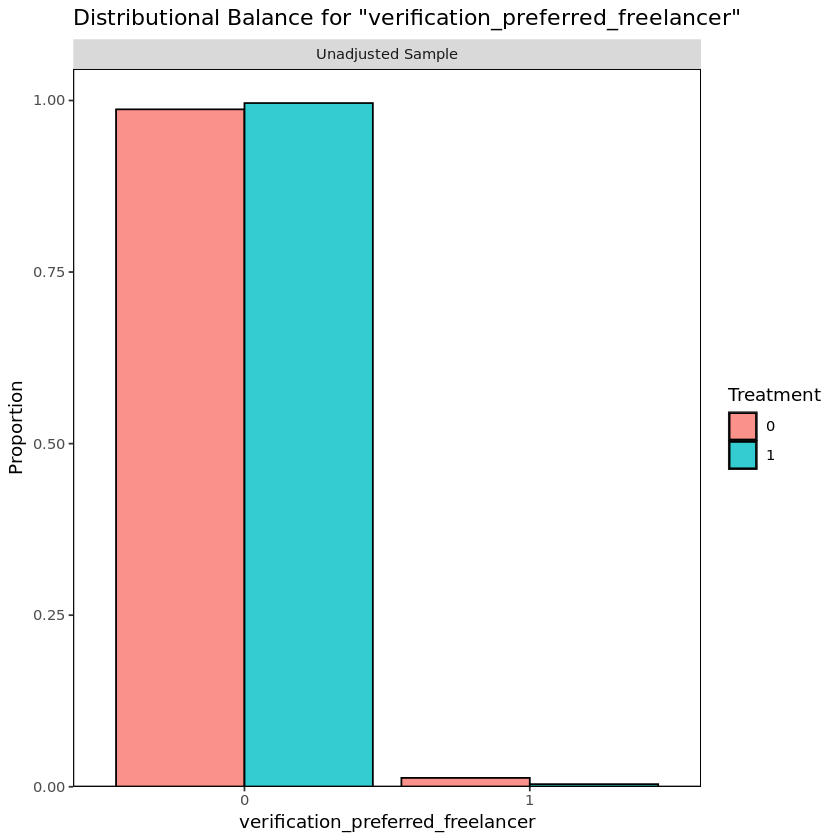

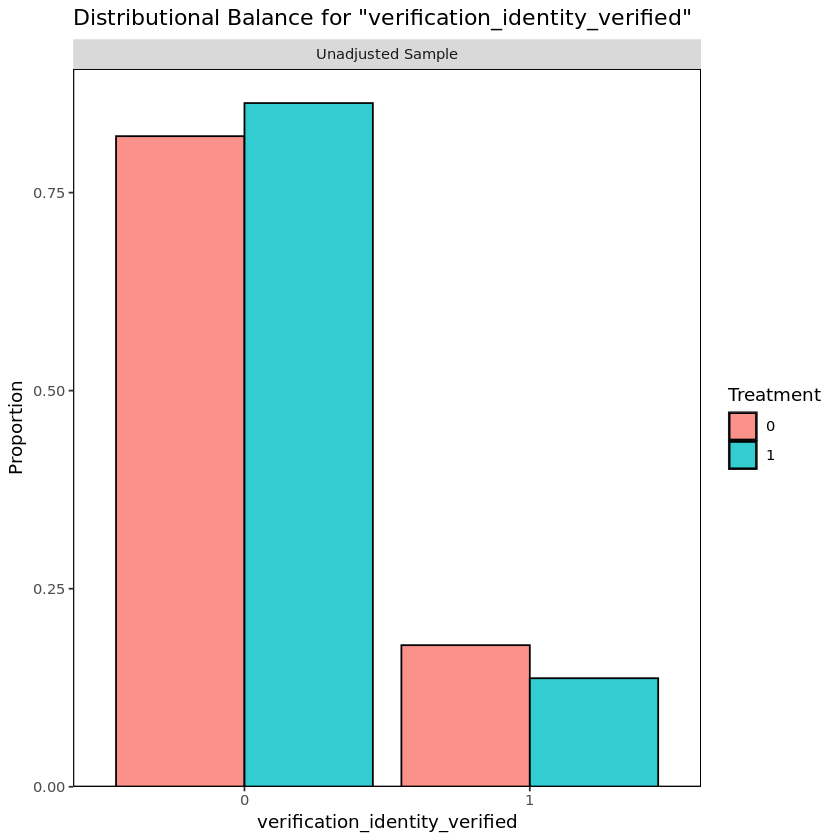

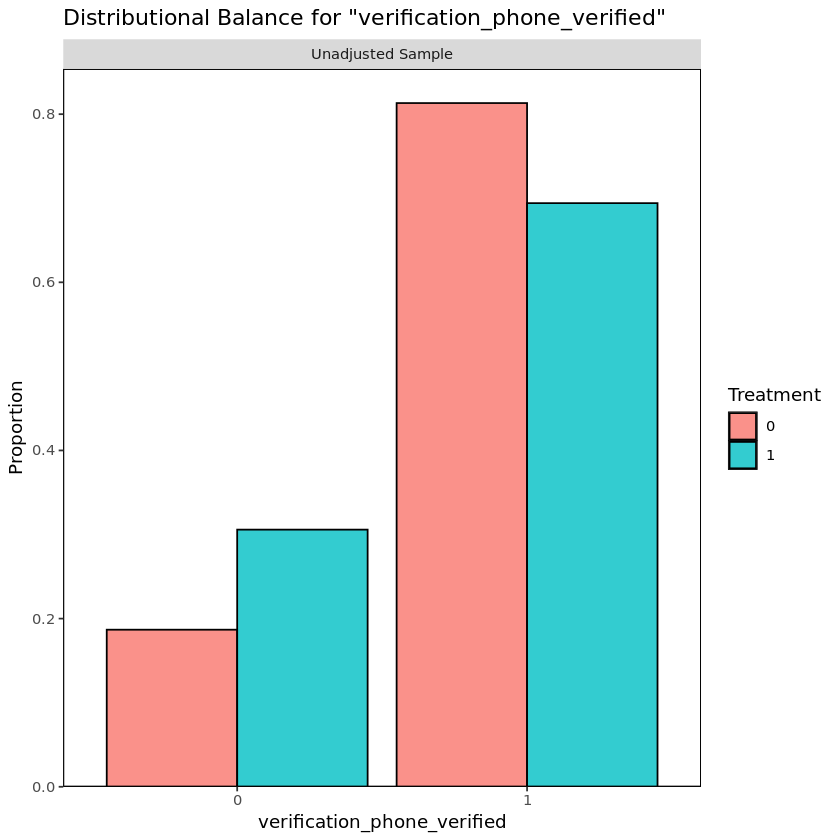

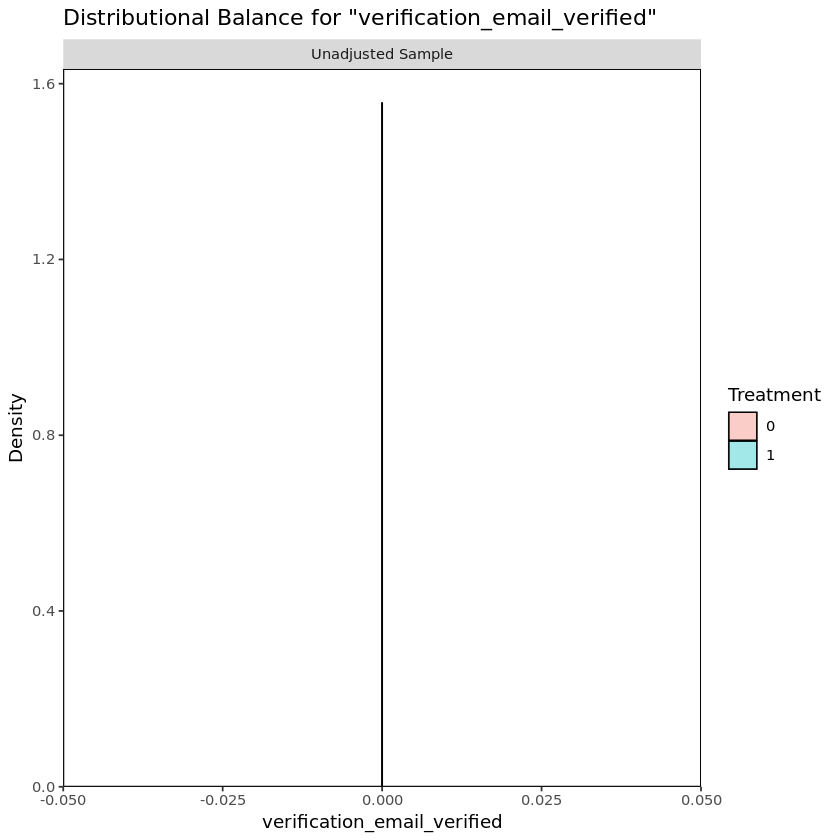

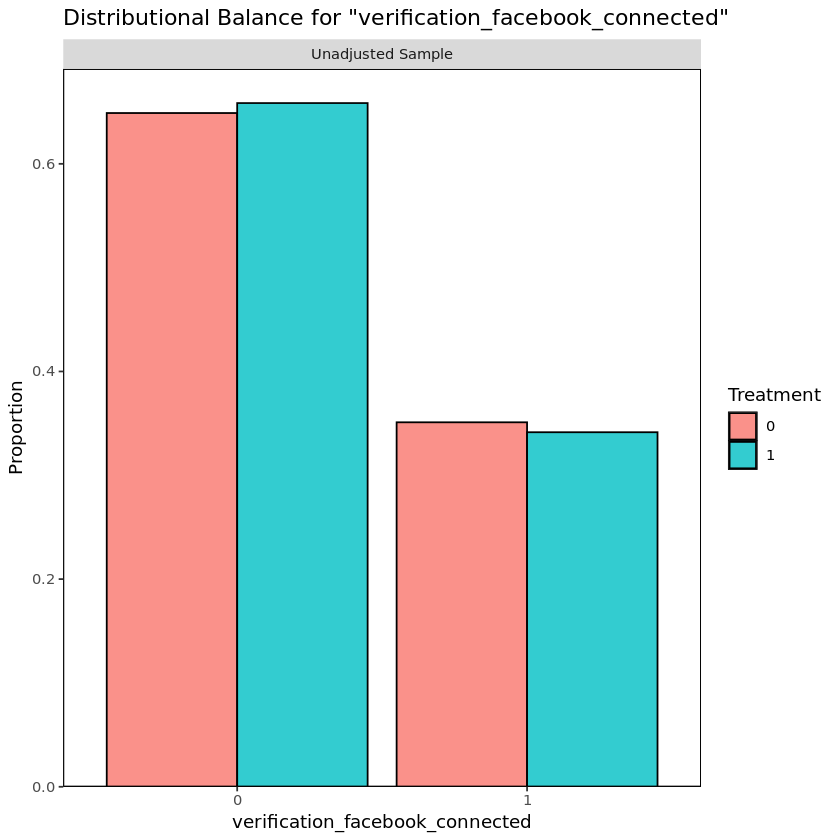

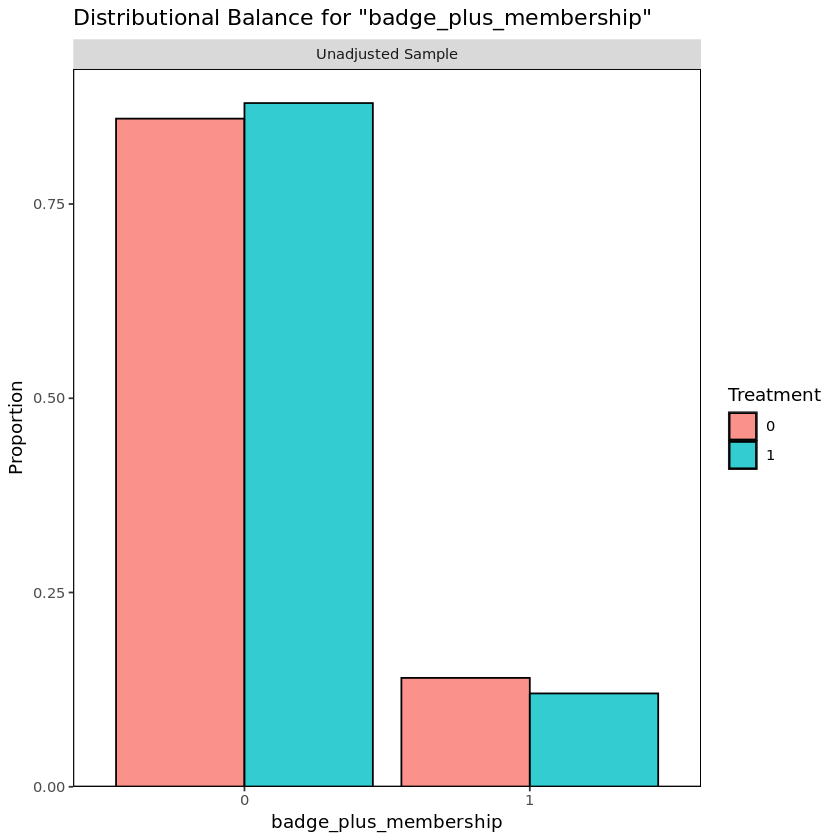

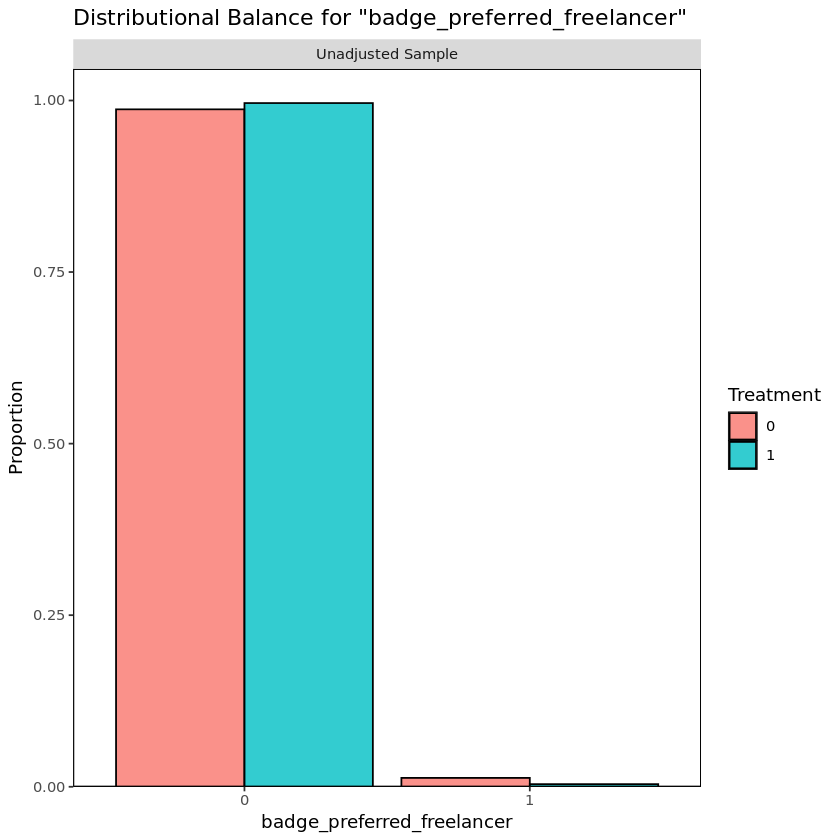

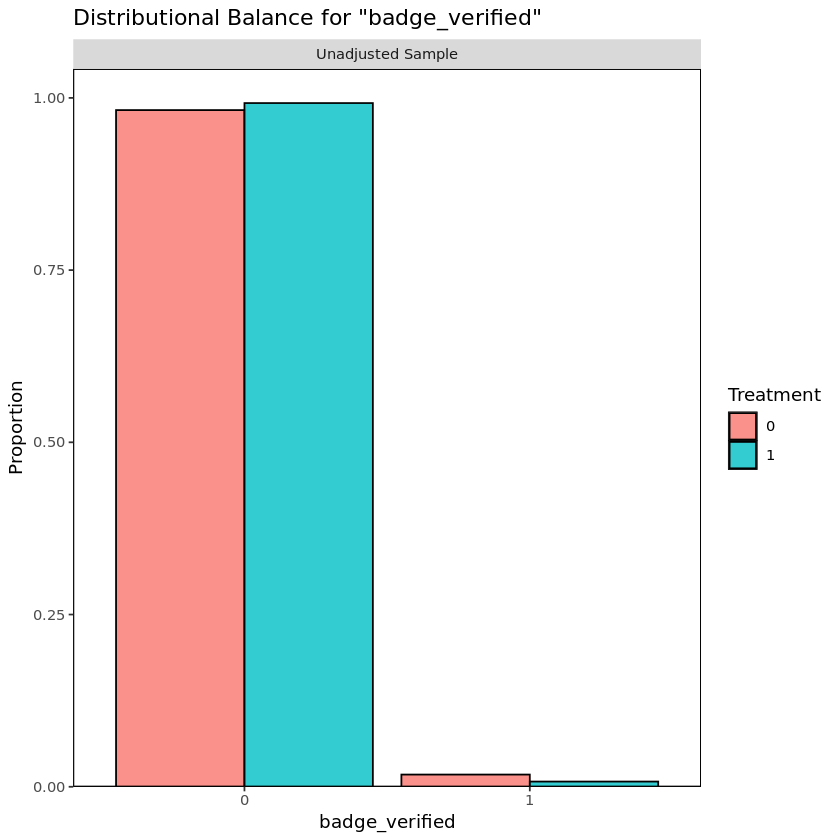

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=copywriter, var.name=c))
}  

### e. Matching for designers

In [ ]:
attach(designer)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)

The following objects are masked from copywriter:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills


The fo

                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

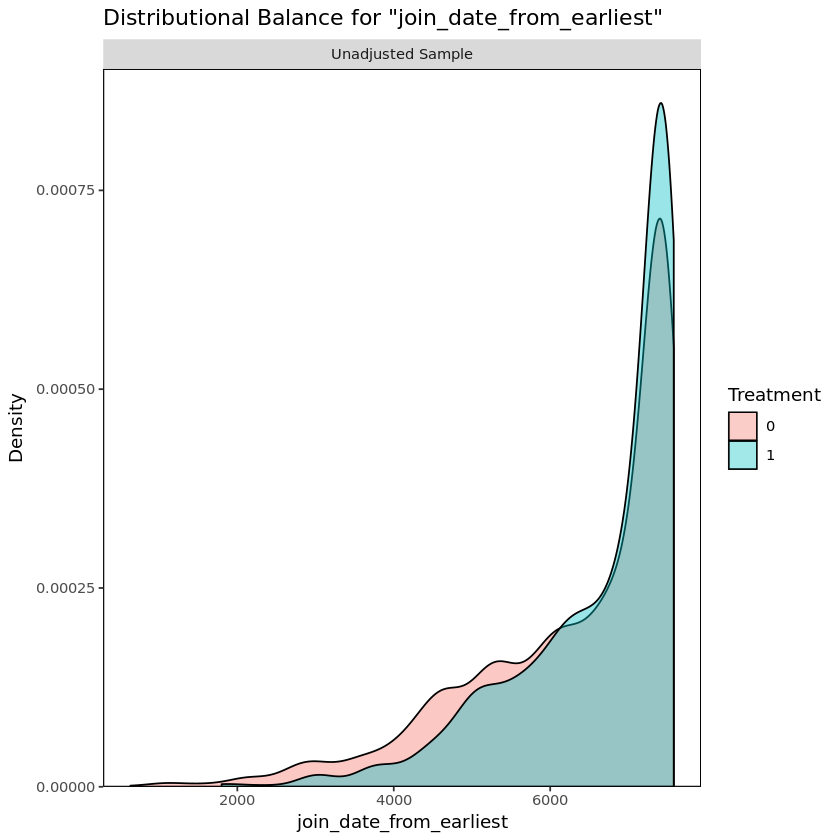

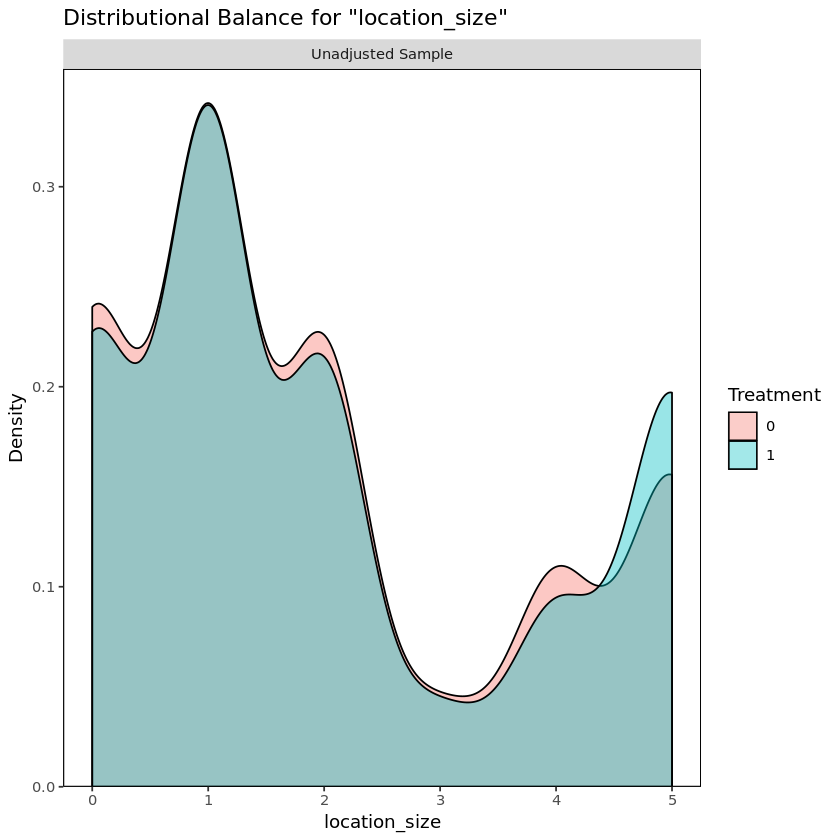

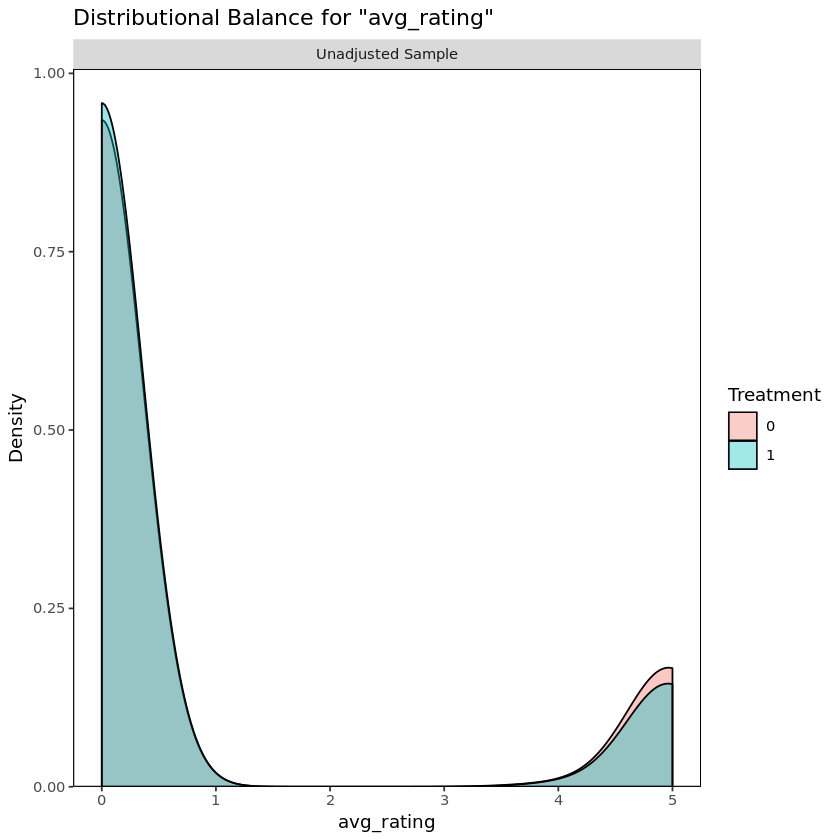

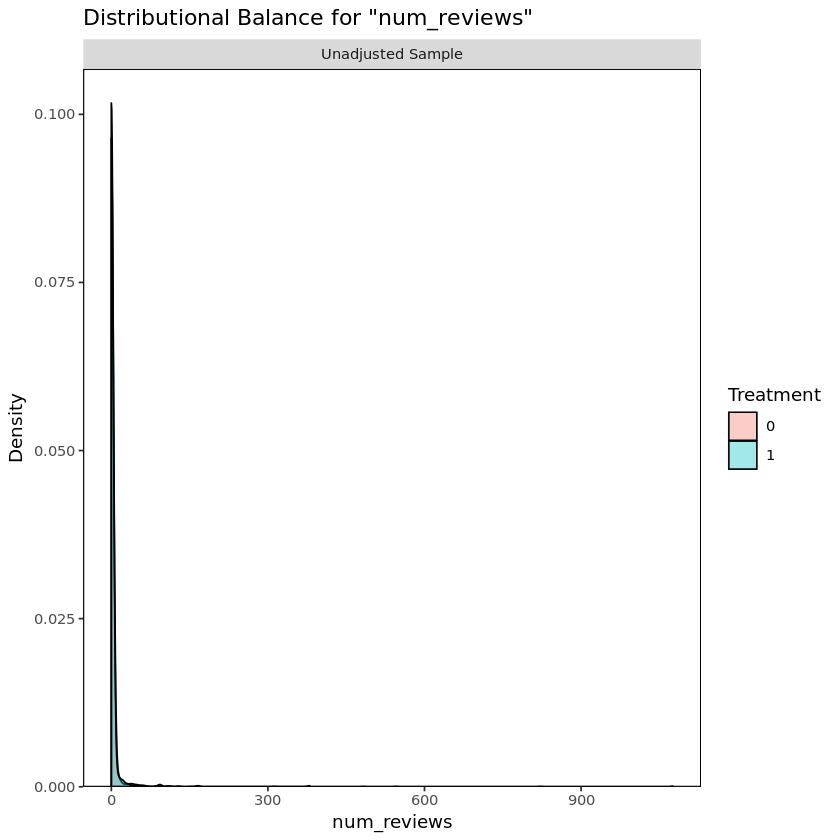

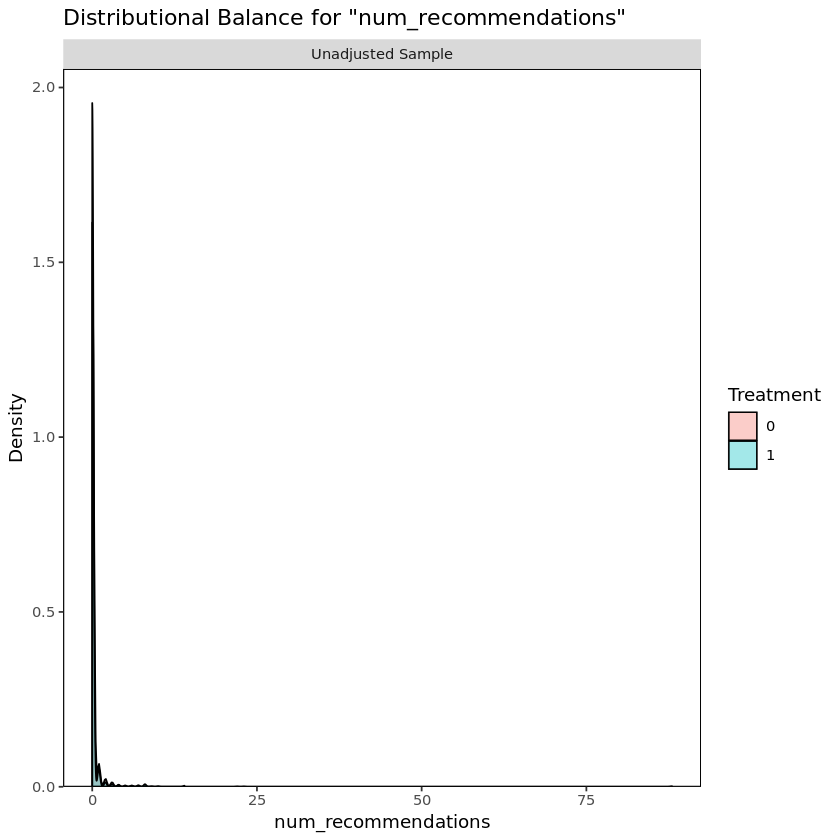

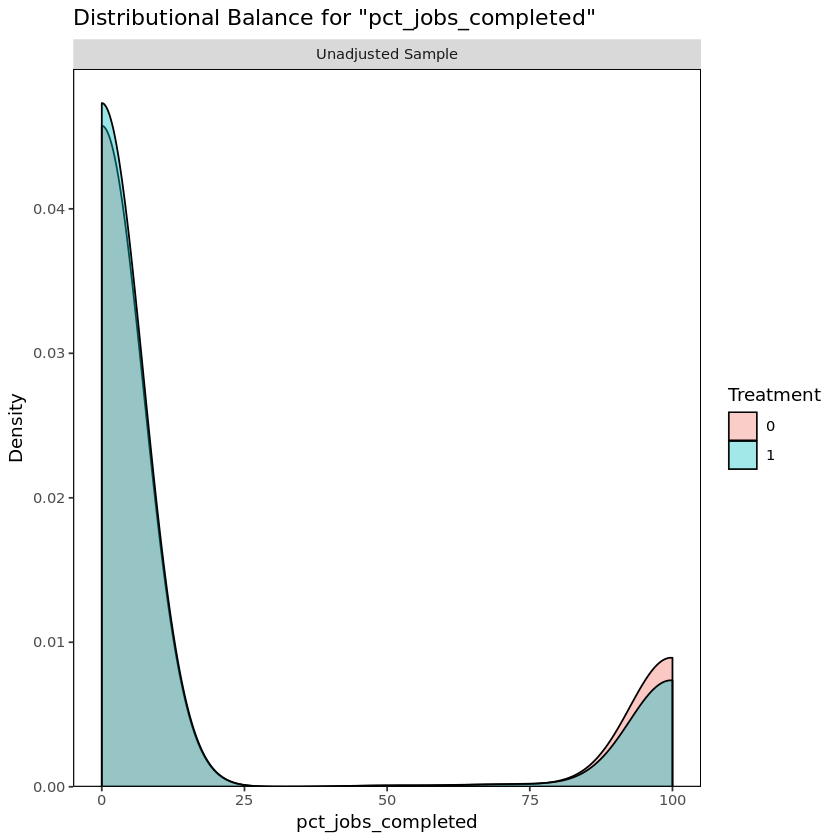

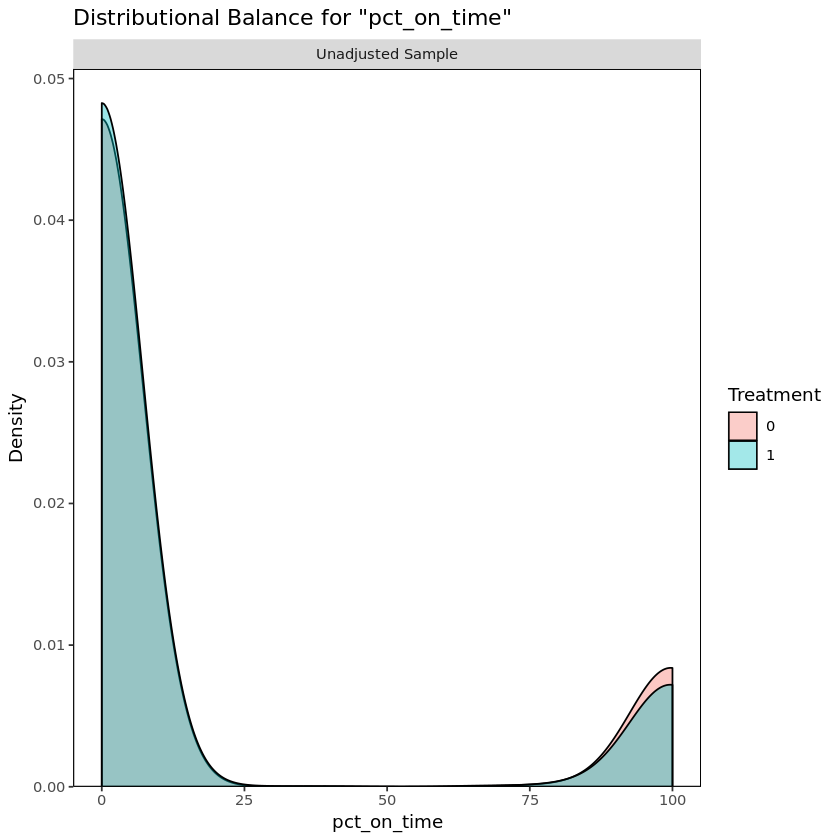

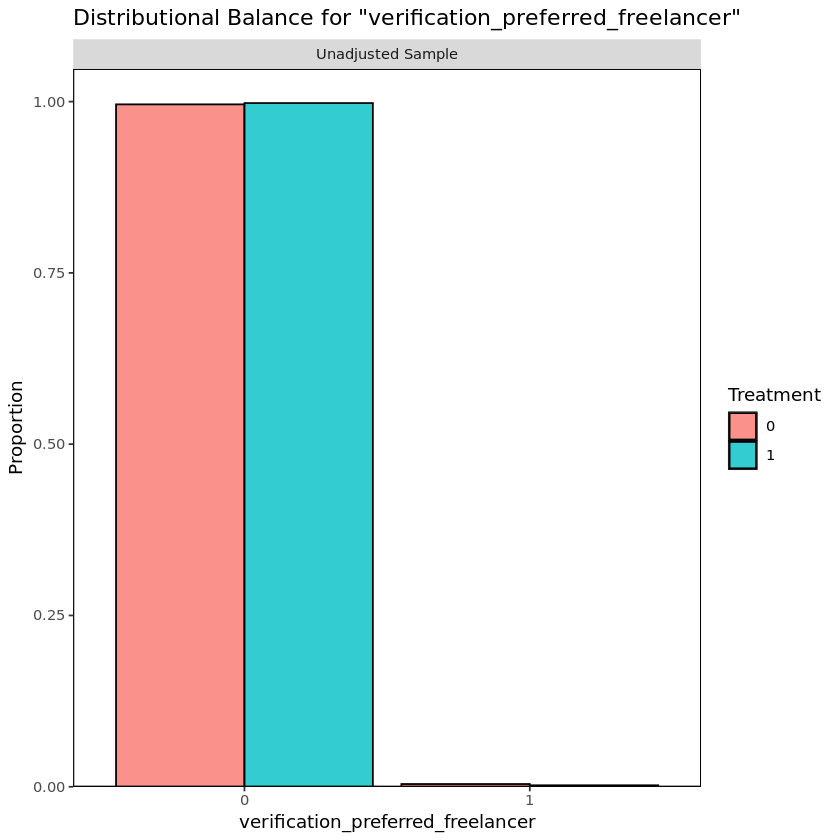

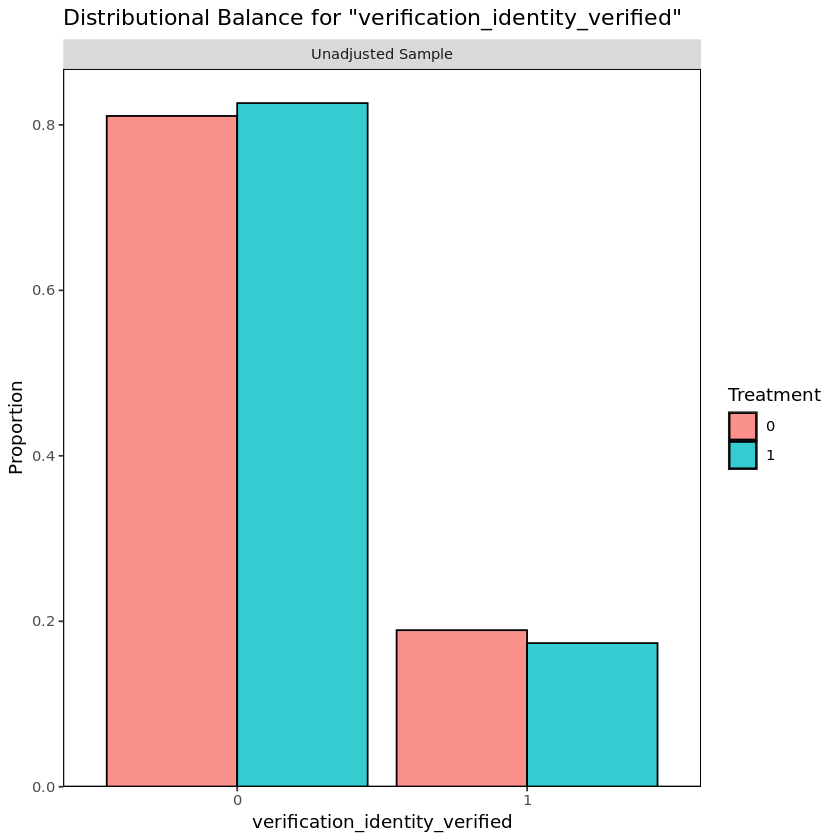

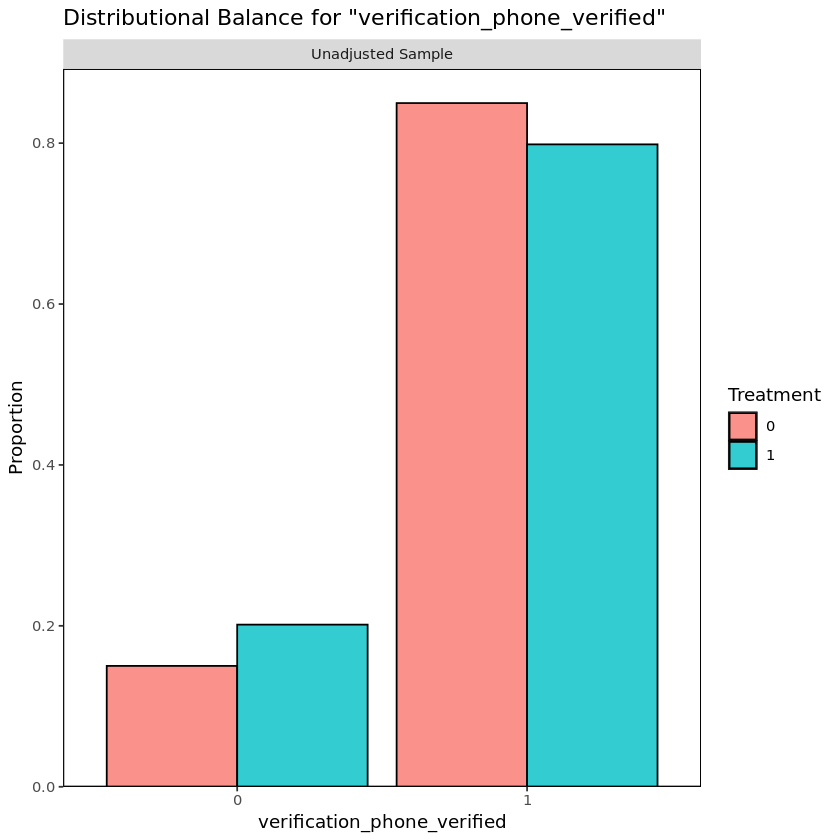

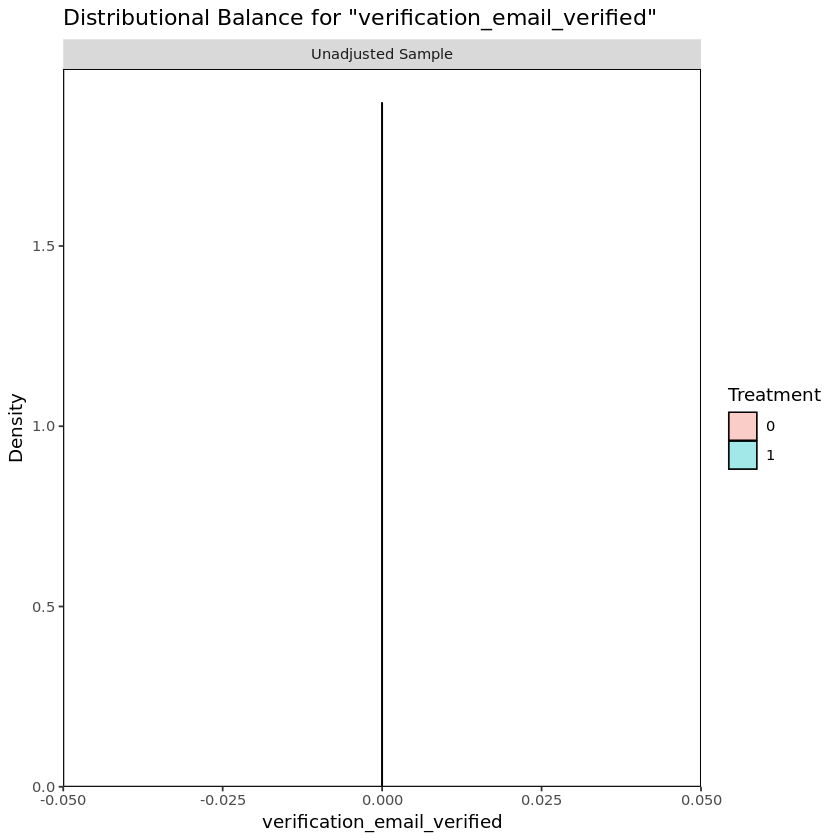

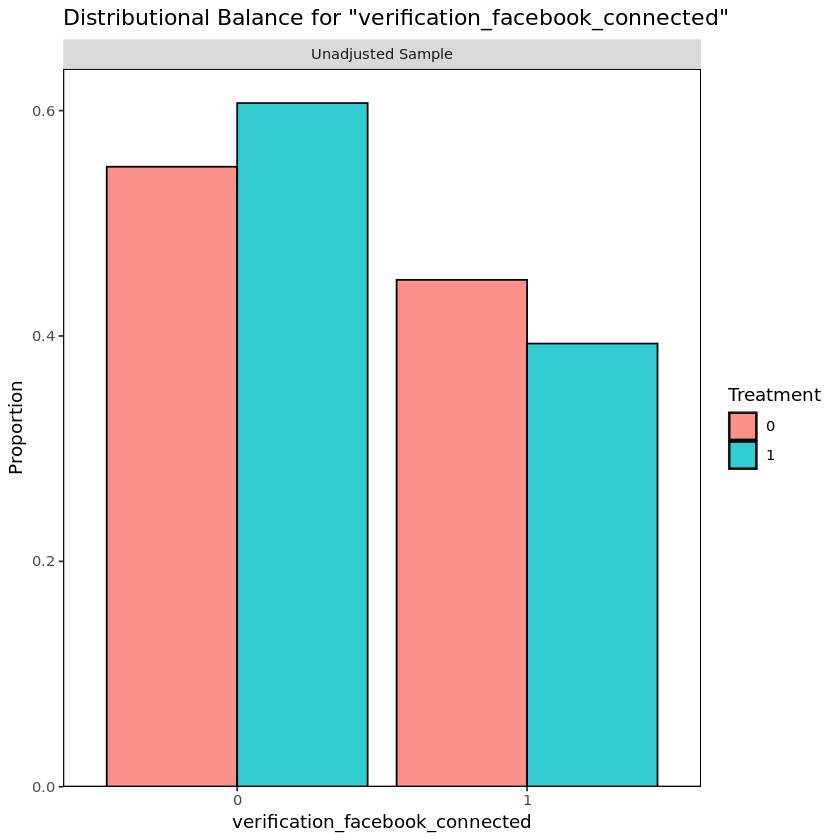

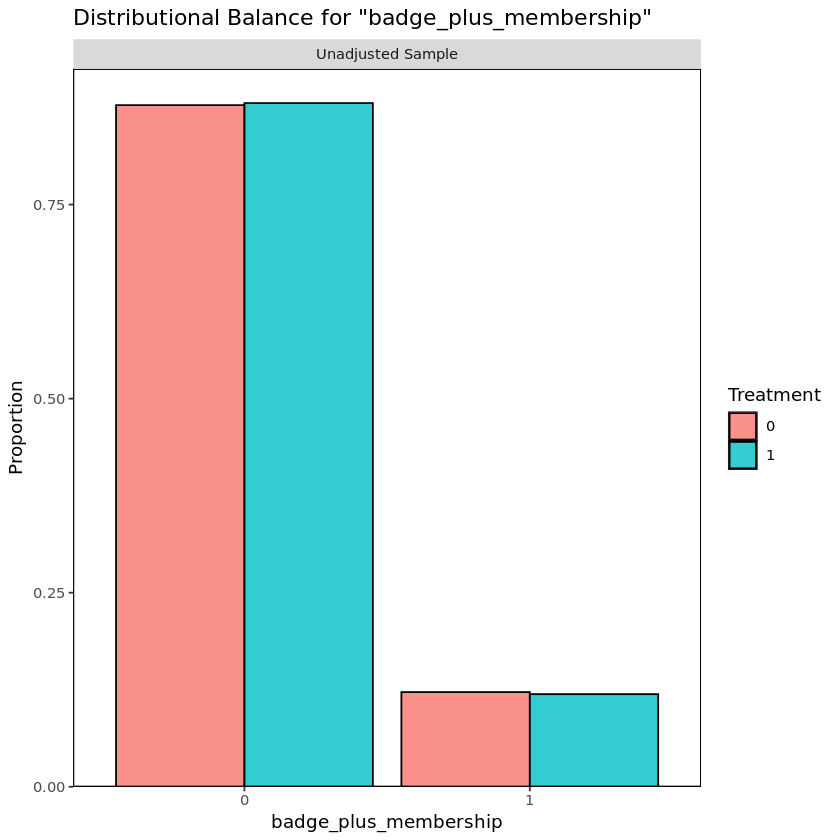

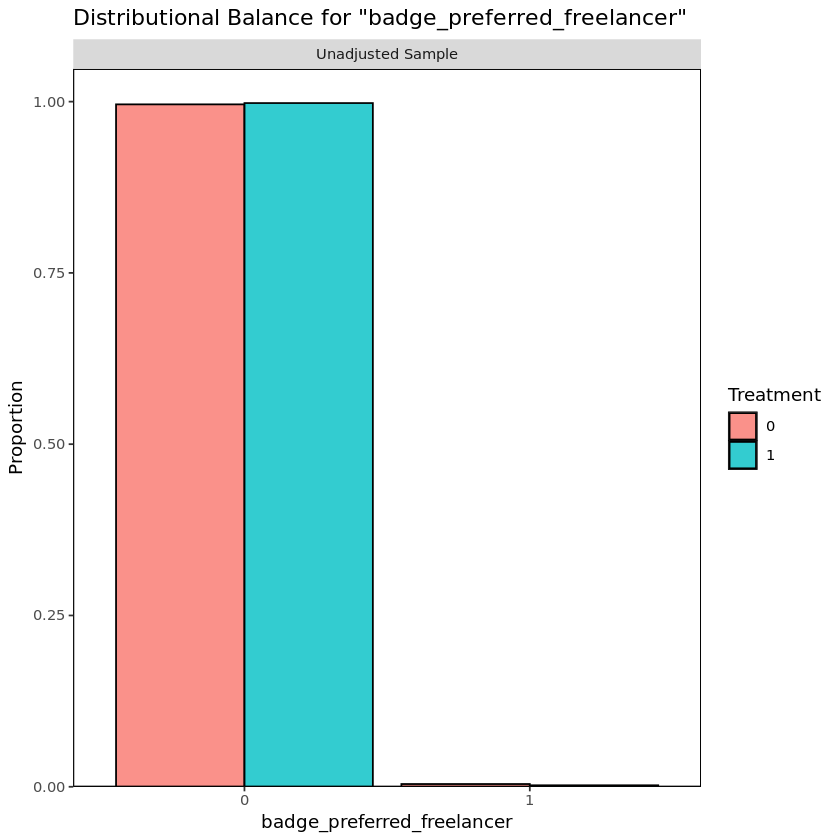

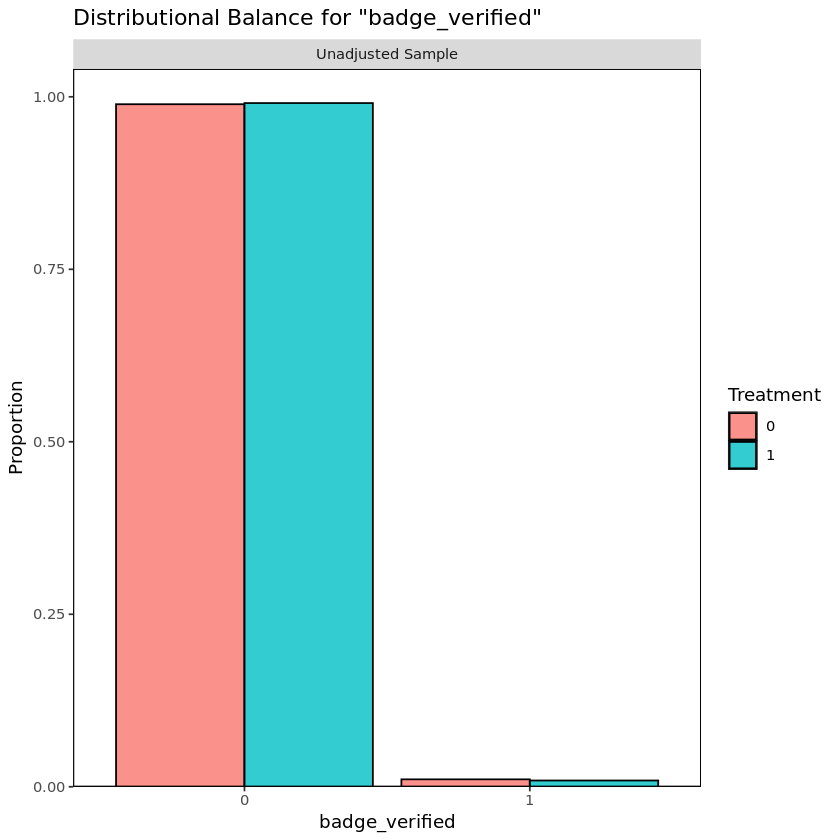

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=designer, var.name=c))
}  

### f. Matching for marketers

In [ ]:
attach(marketer)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)

var 2:
best............ 8.888135e+02
mean............ 4.495138e+02
variance........ 7.332799e+04
var 3:
best............ 7.196139e+02
mean............ 5.435620e+02
variance........ 7.109766e+04
var 4:
best............ 5.857234e+02
mean............ 4.865999e+02
variance........ 7.265842e+04
var 5:
best............ 1.308395e+02
mean............ 4.403522e+02
variance........ 7.077854e+04
var 6:
best............ 3.314760e+02
mean............ 5.074475e+02
variance........ 9.000599e+04
var 7:
best............ 6.536928e+02
mean............ 4.757732e+02
variance........ 9.884898e+04
var 8:
best............ 9.422667e+02
mean............ 5.139356e+02
variance........ 7.830523e+04
var 9:
best............ 6.301752e+02
mean............ 4.917383e+02
variance........ 8.183599e+04
var 10:
best............ 7.050776e+02
mean............ 4.903132e+02
variance........ 7.525667e+04
var 11:
best............ 3.395781e+02
mean............ 4.159023e+02
variance........ 8.992043e+04
var 12:
best............ 2.9

                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

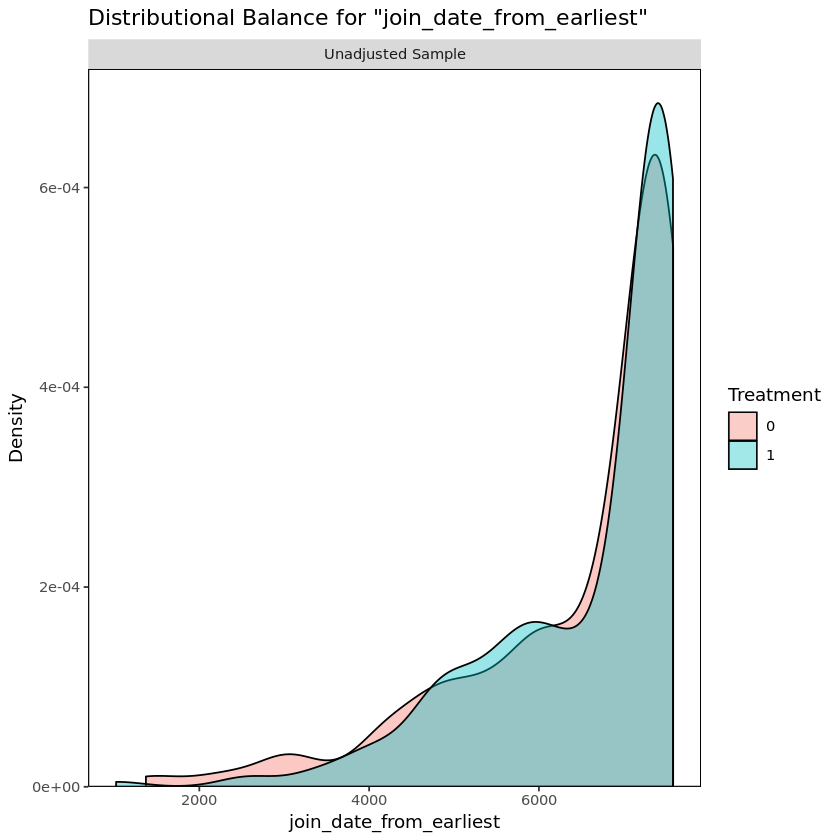

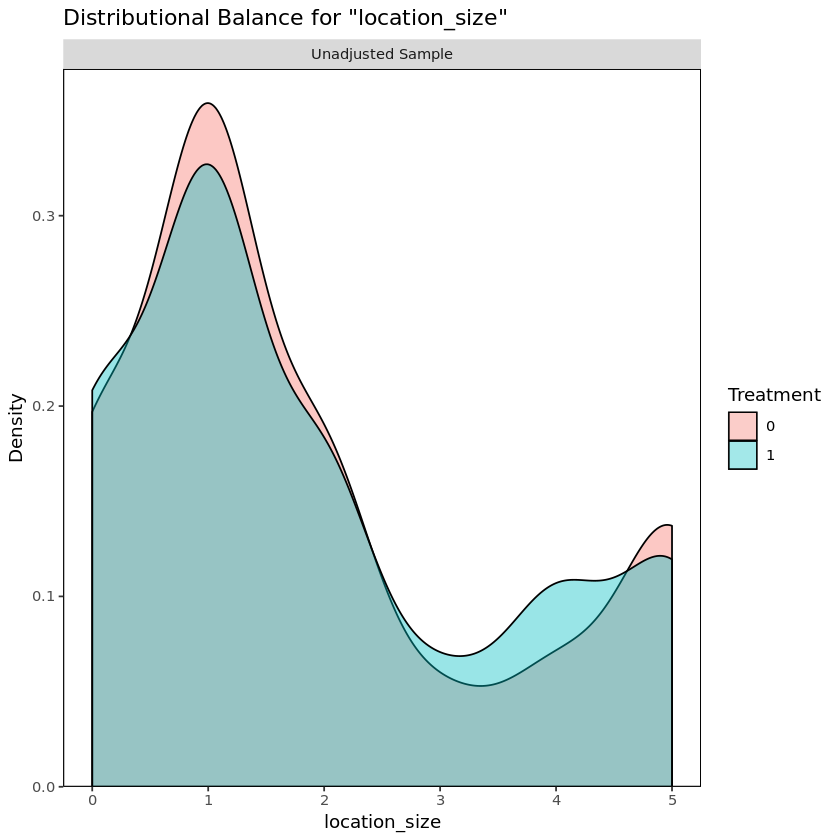

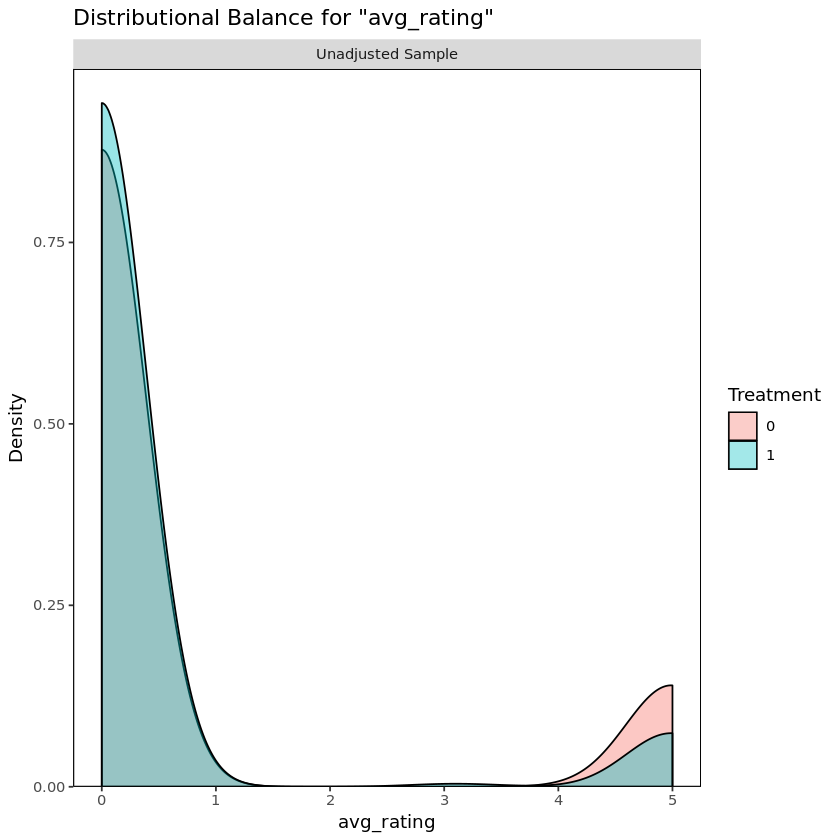

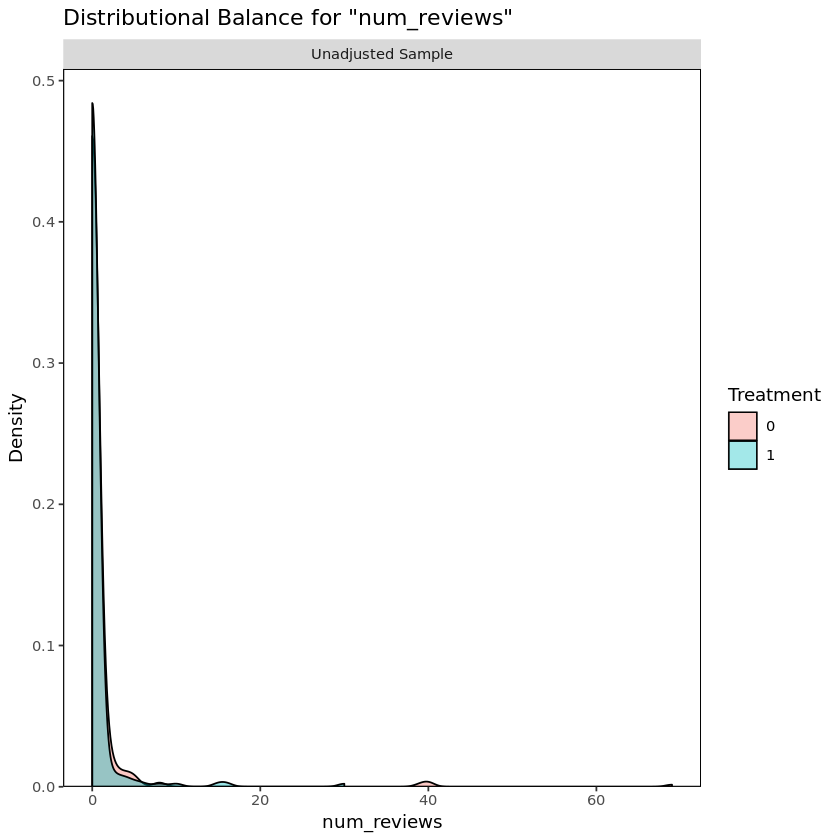

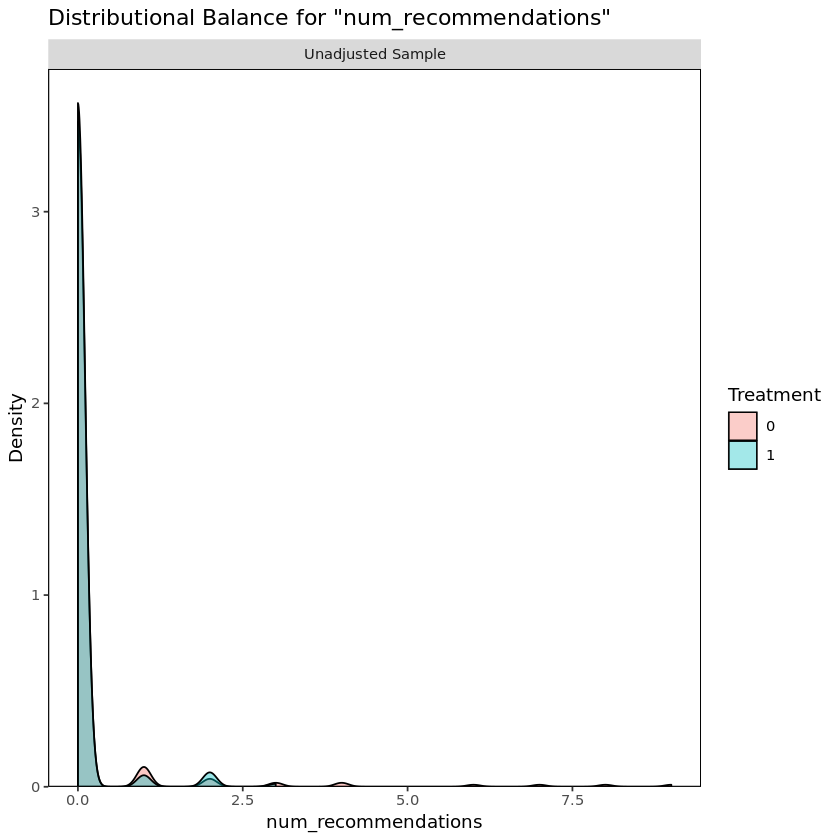

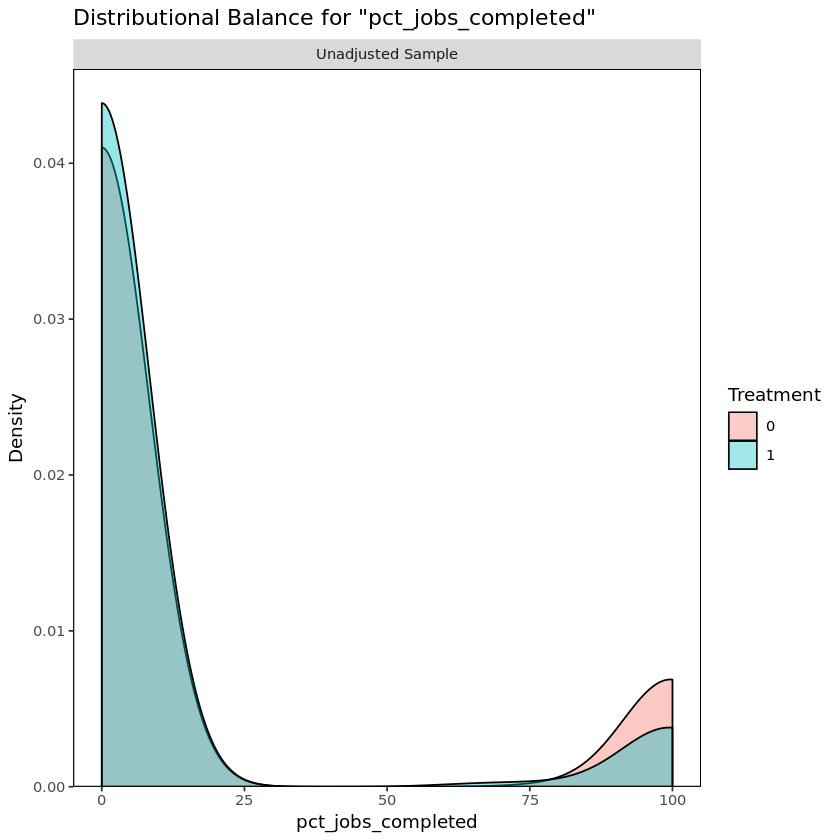

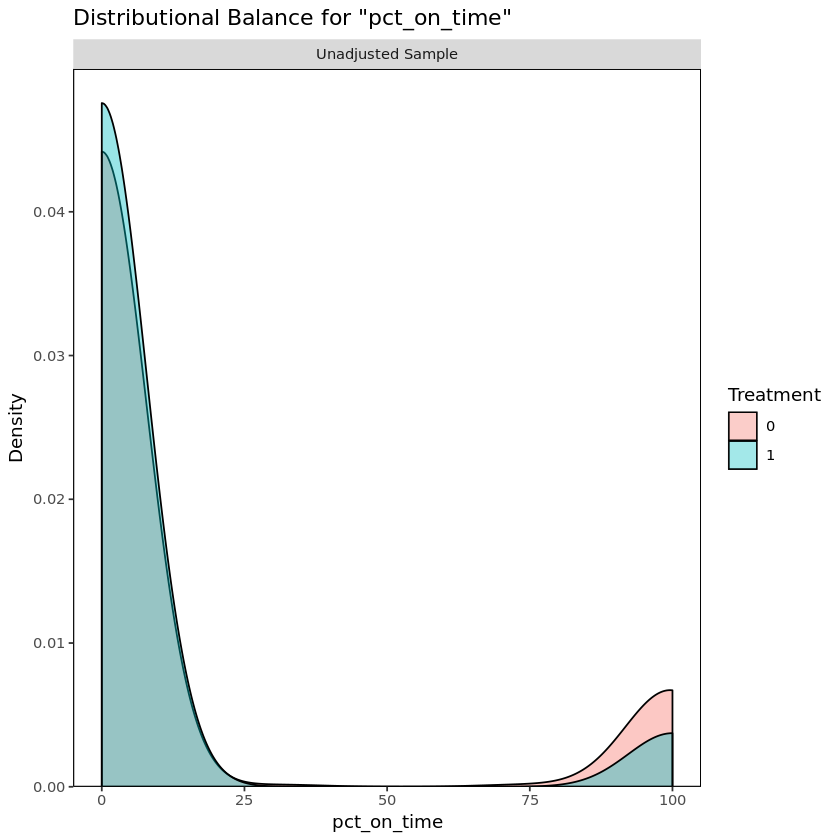

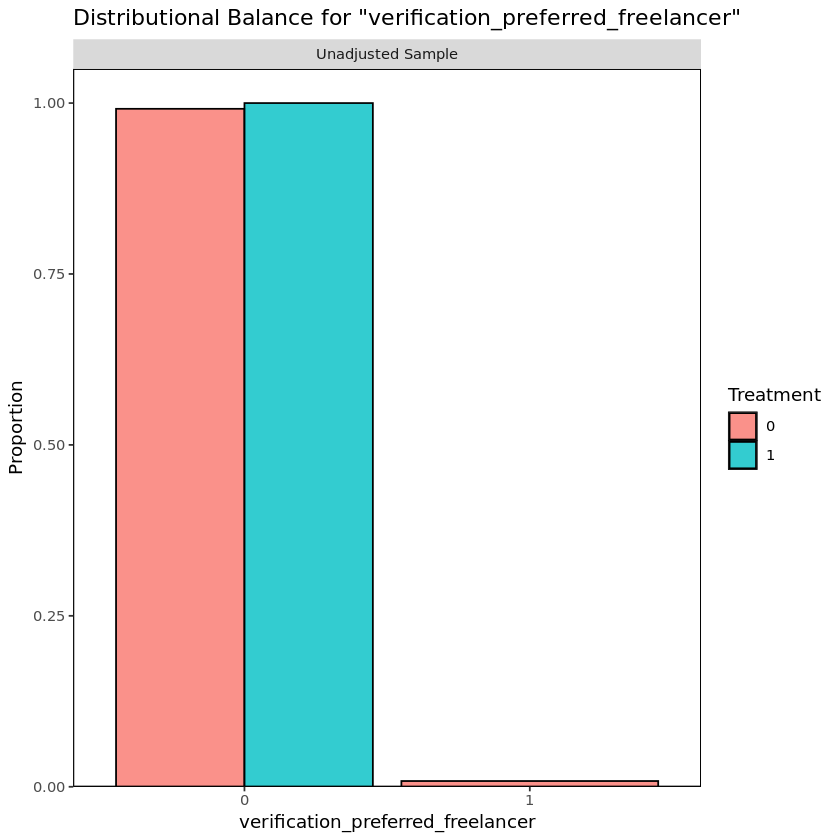

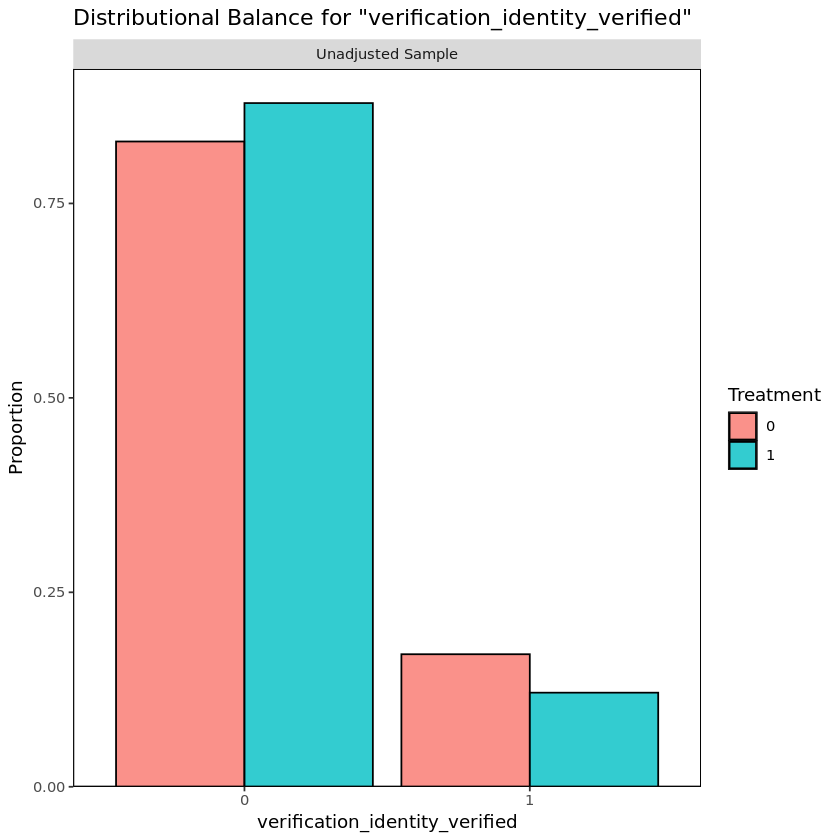

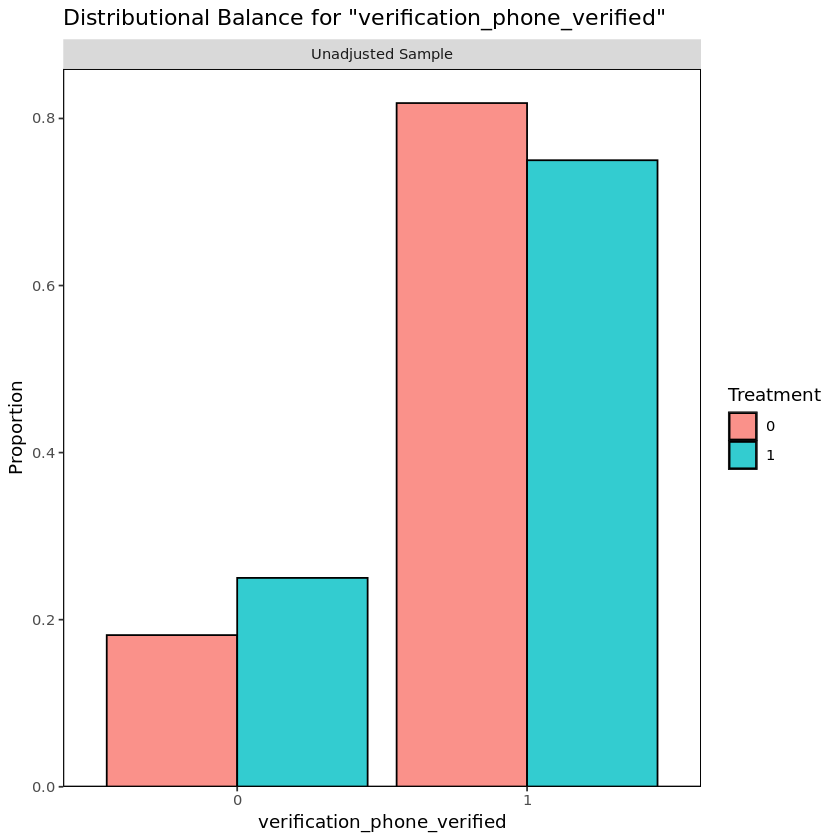

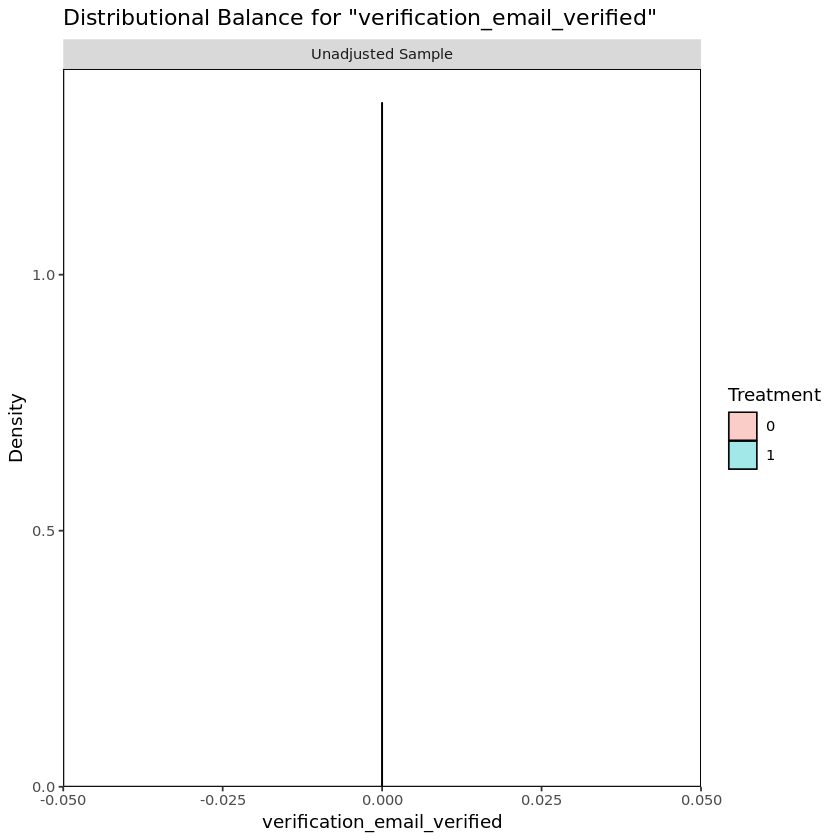

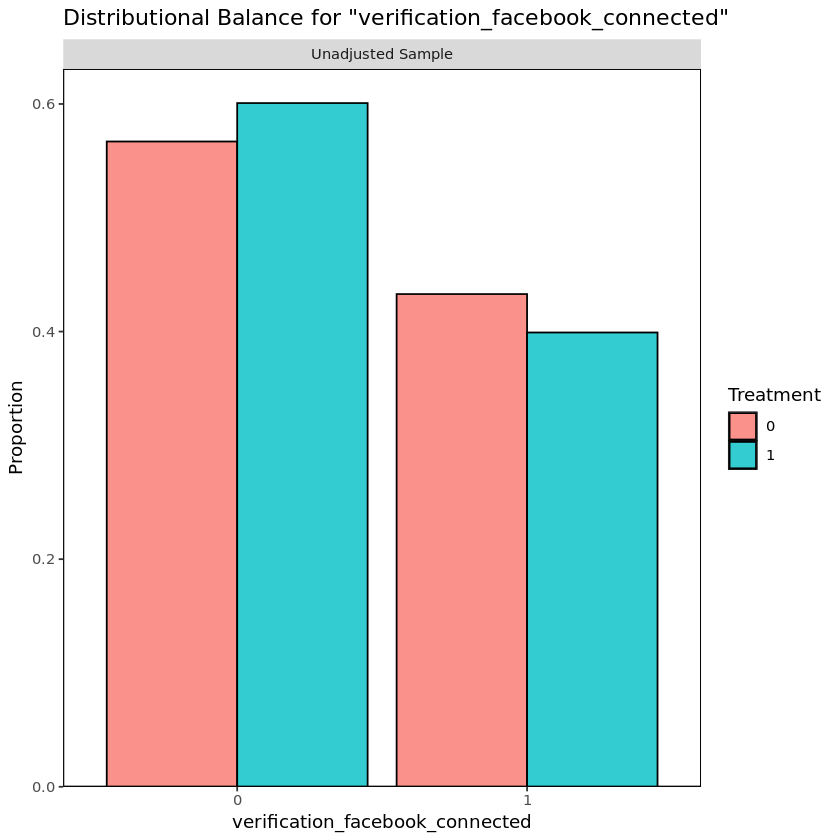

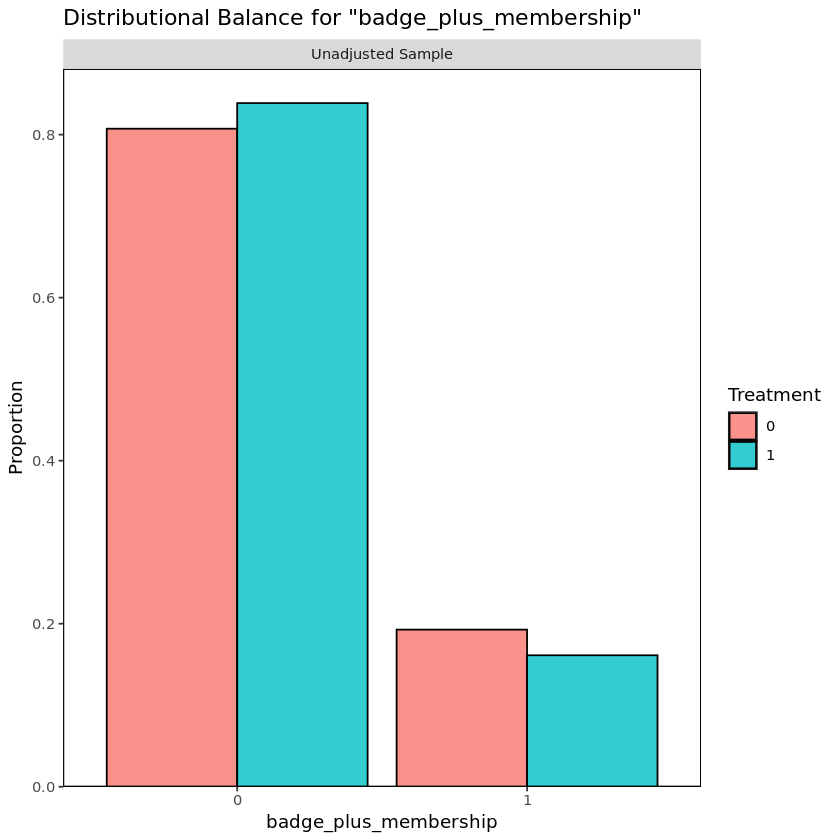

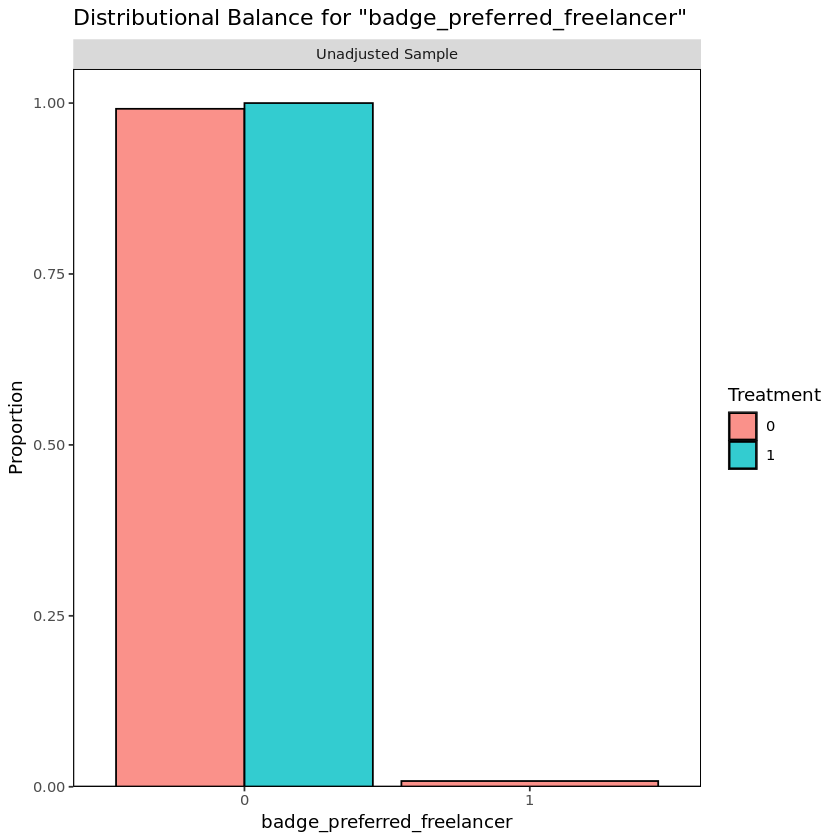

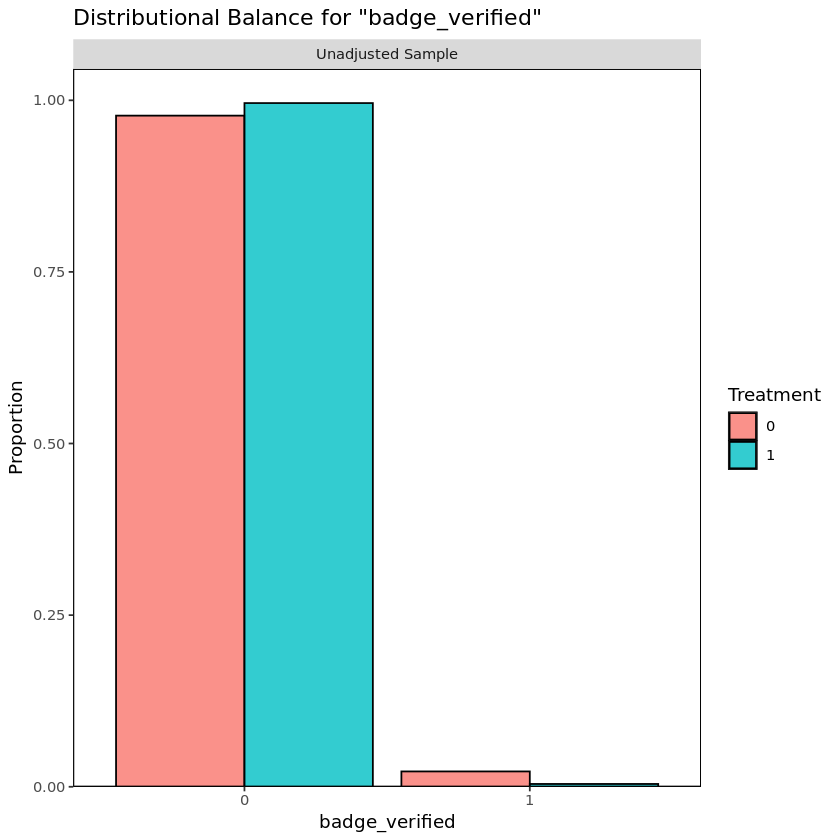

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=marketer, var.name=c))
}  

### g. Matching for software engineers

In [ ]:
attach(swe)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)



The following objects are masked from accountant:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills




Th

                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    7     -none- character
BMsmallestVarNumber  7     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

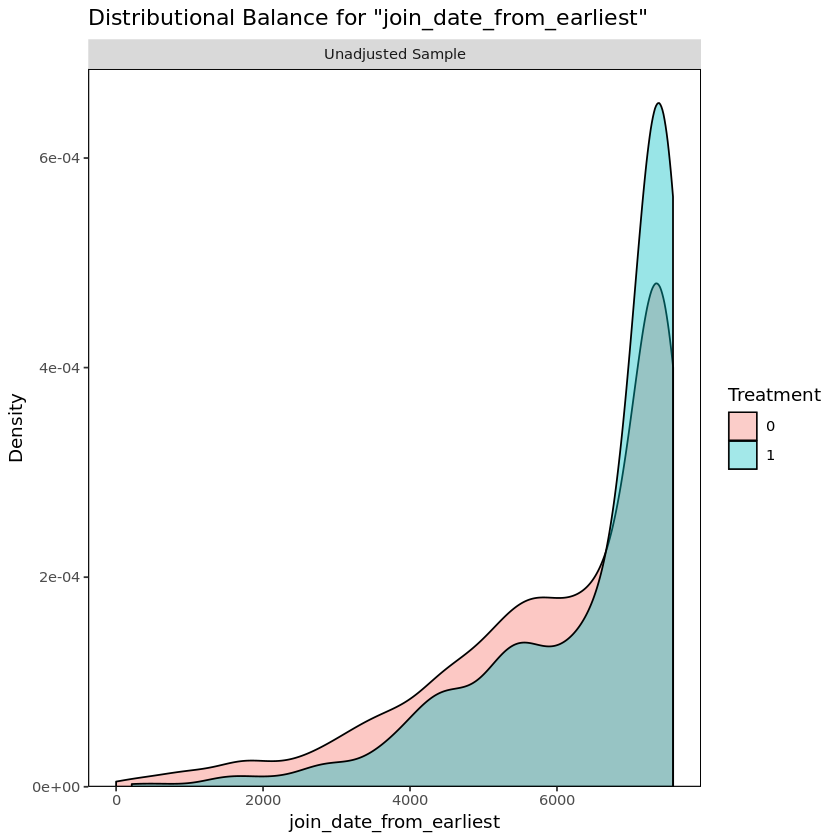

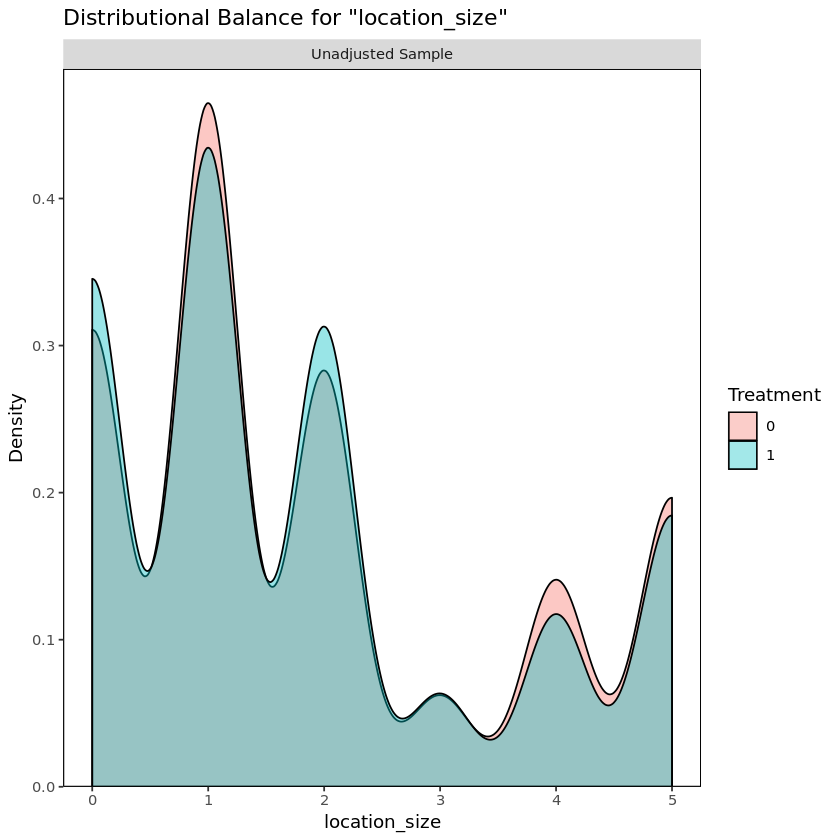

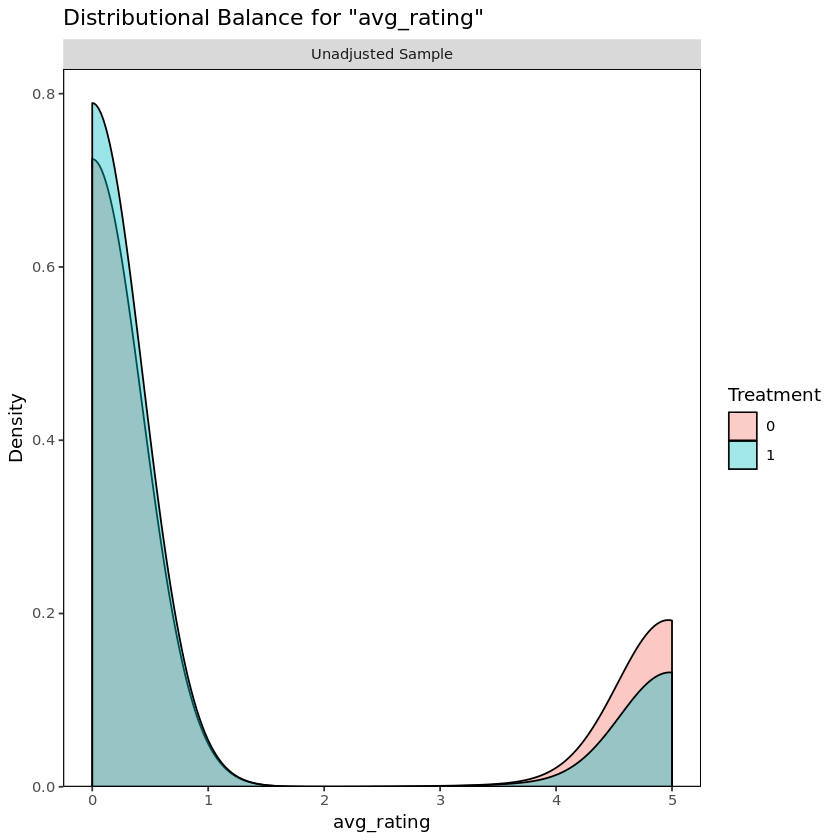

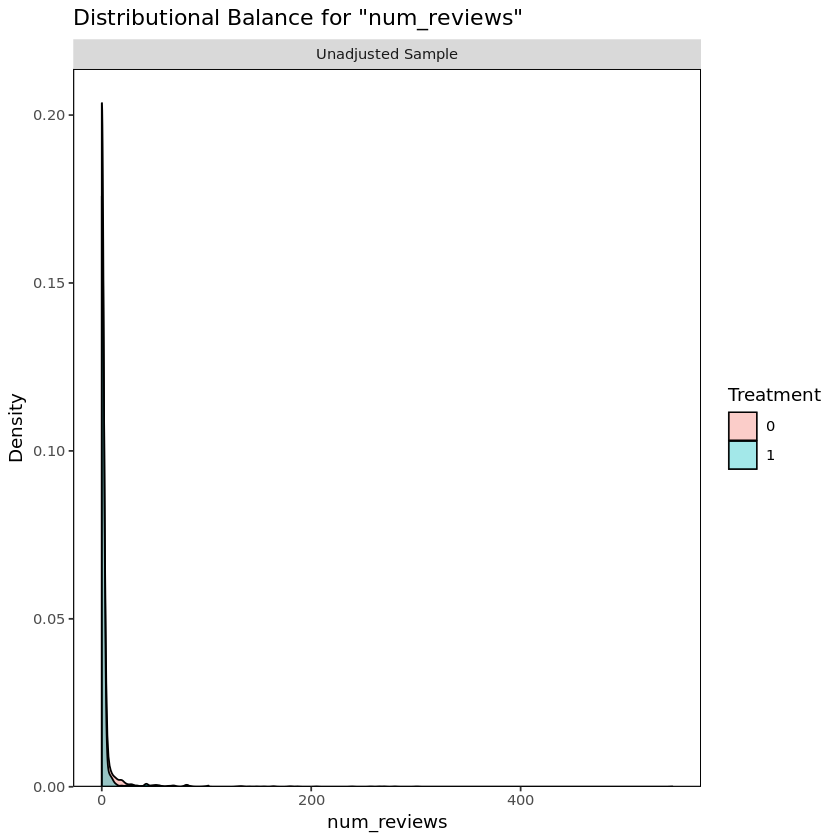

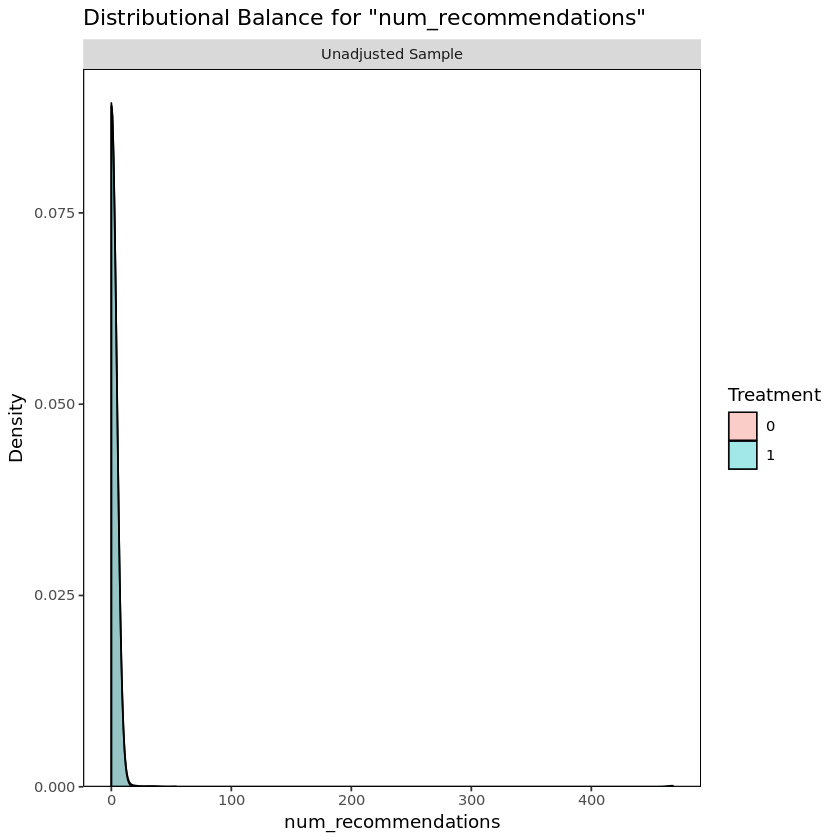

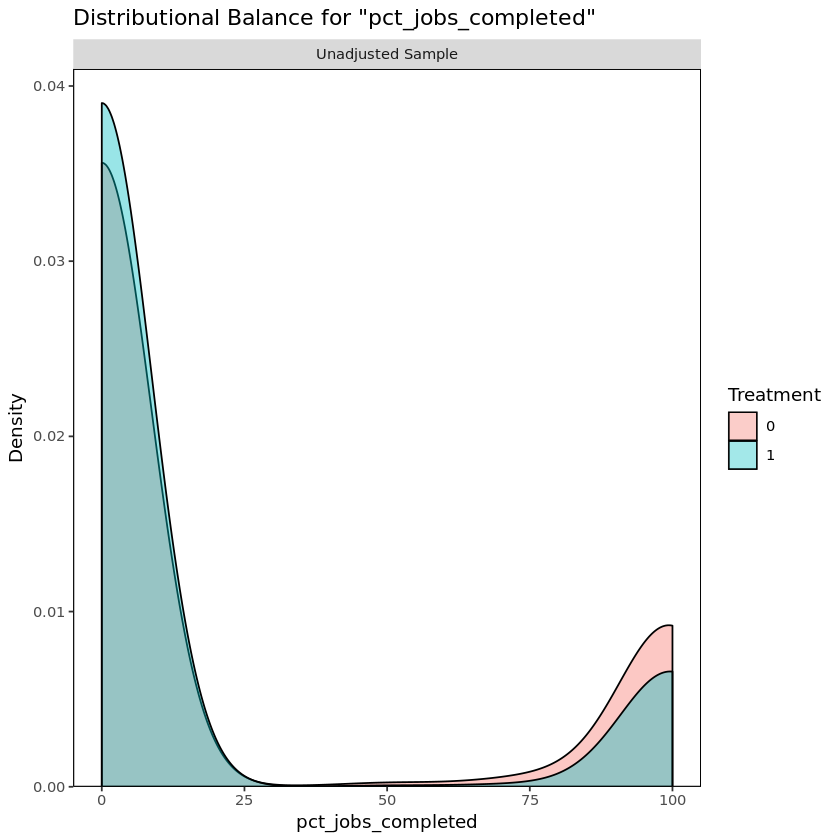

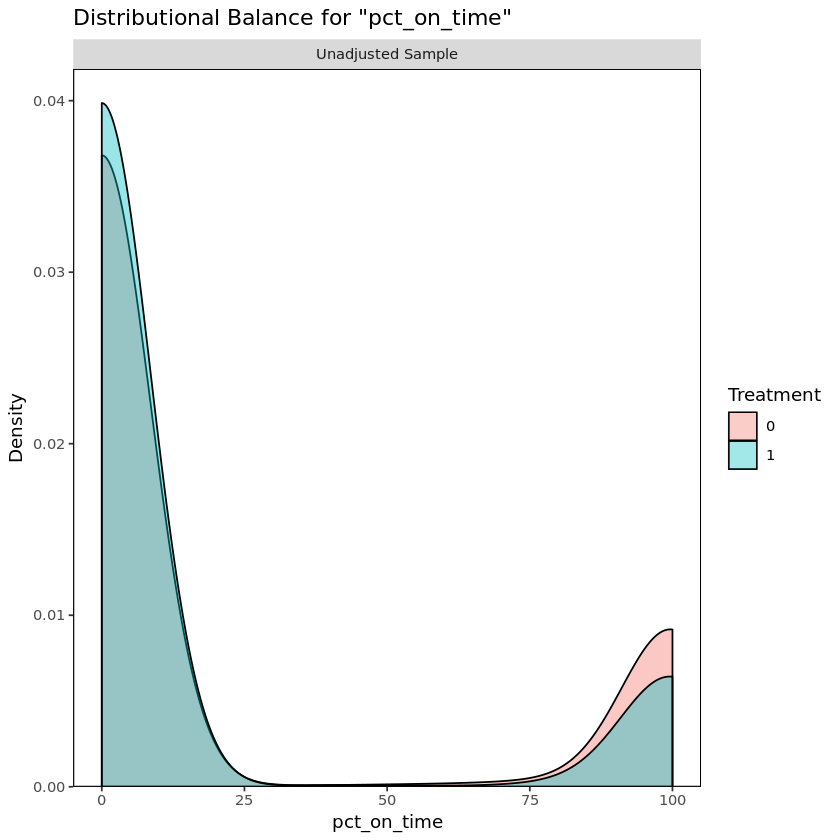

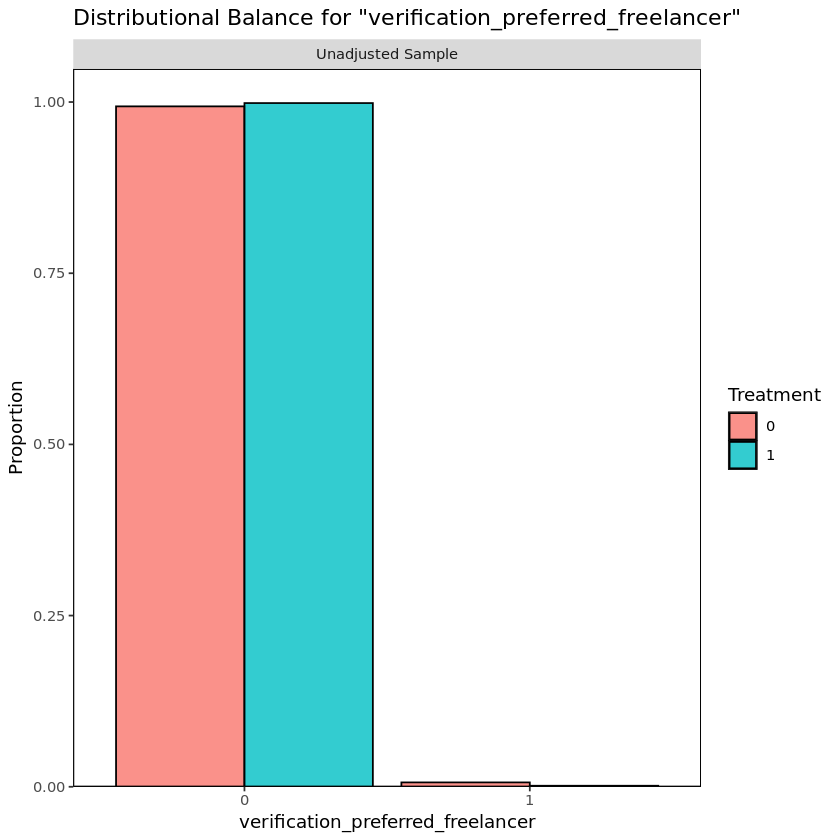

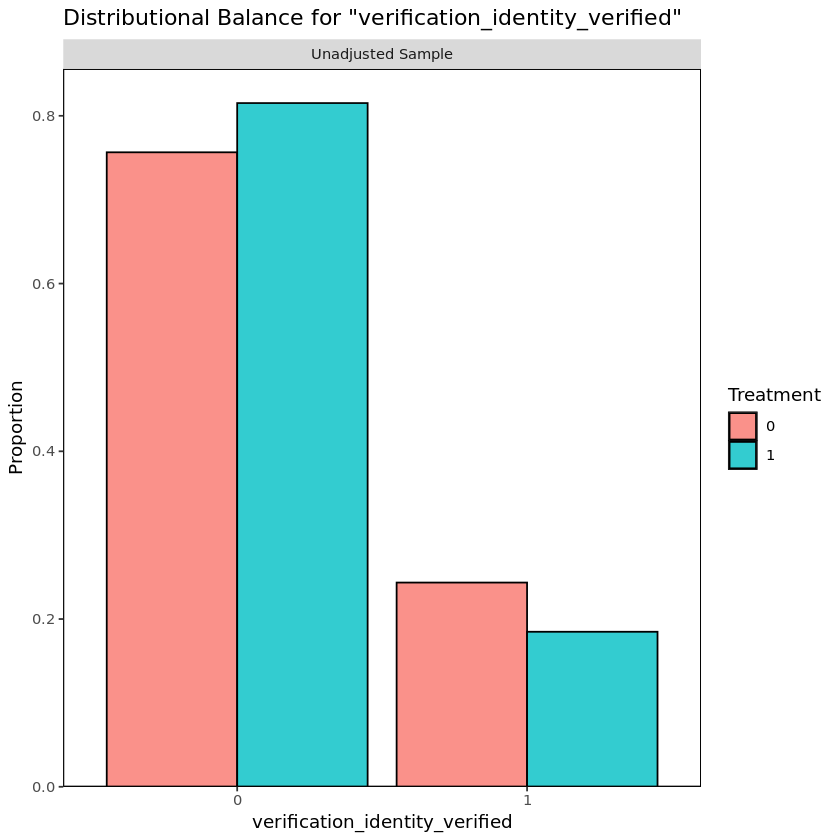

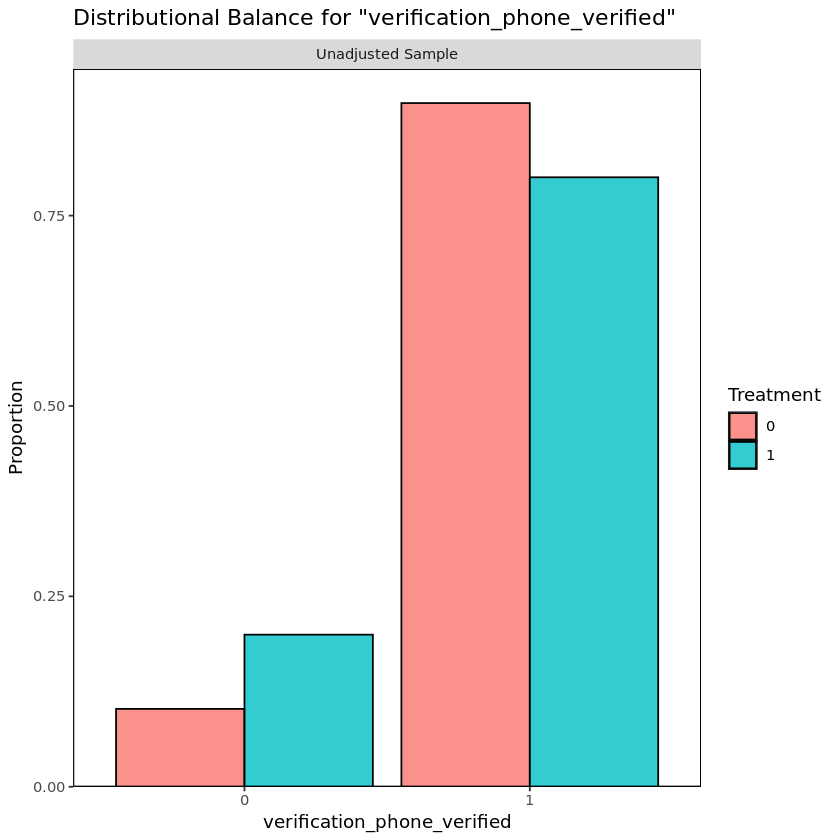

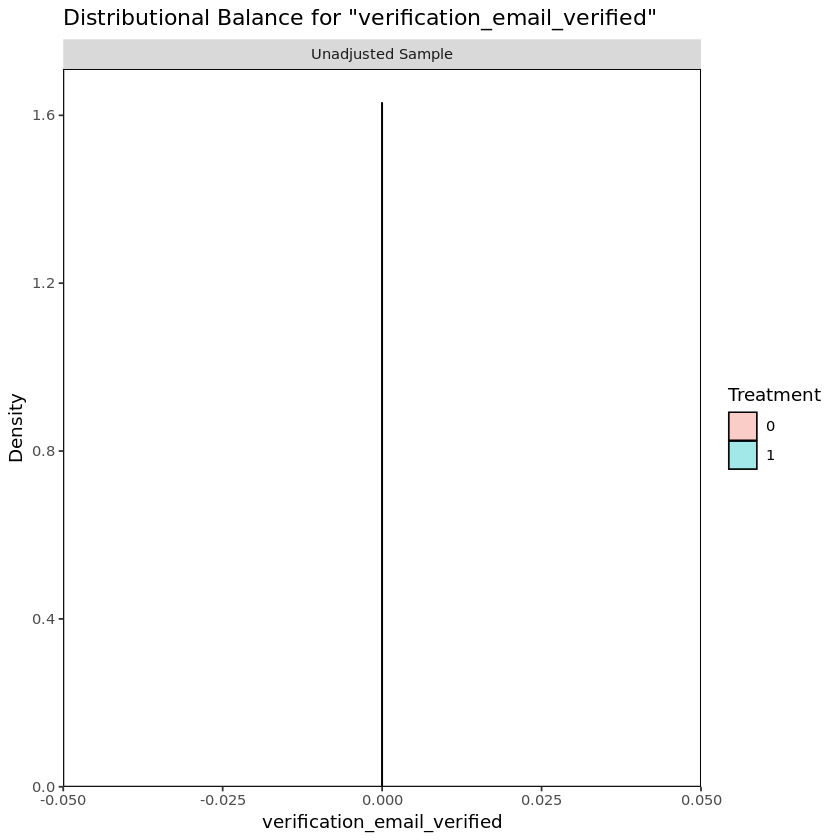

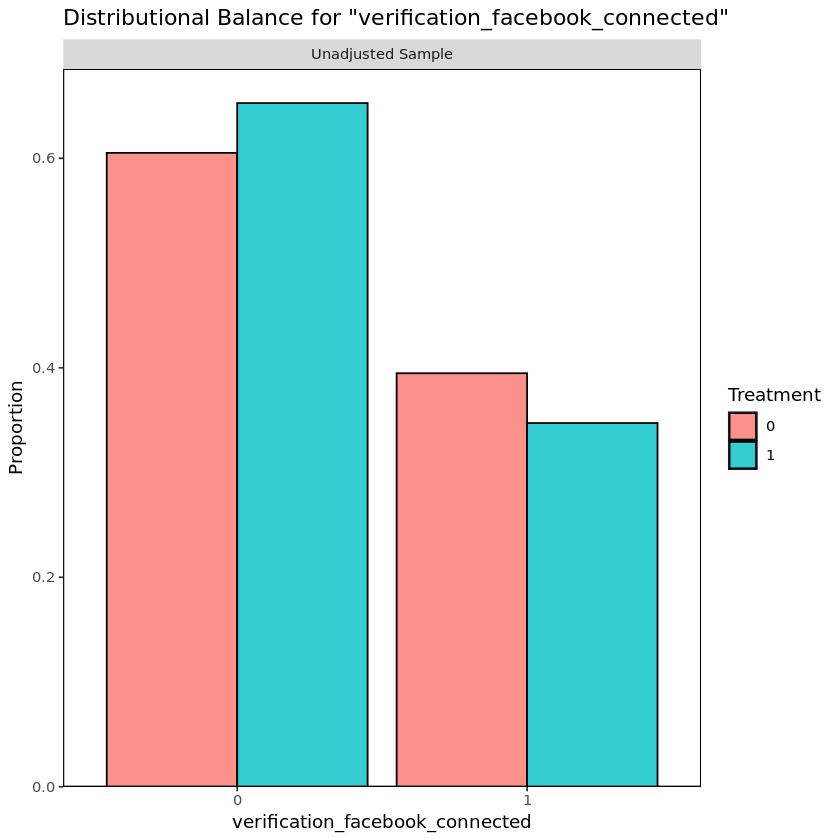

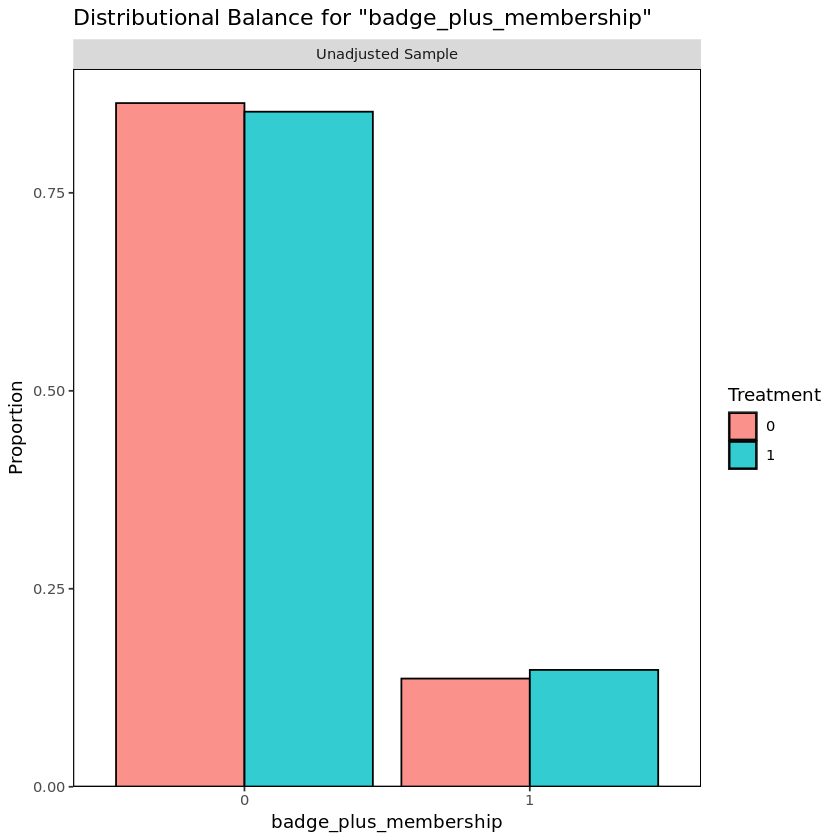

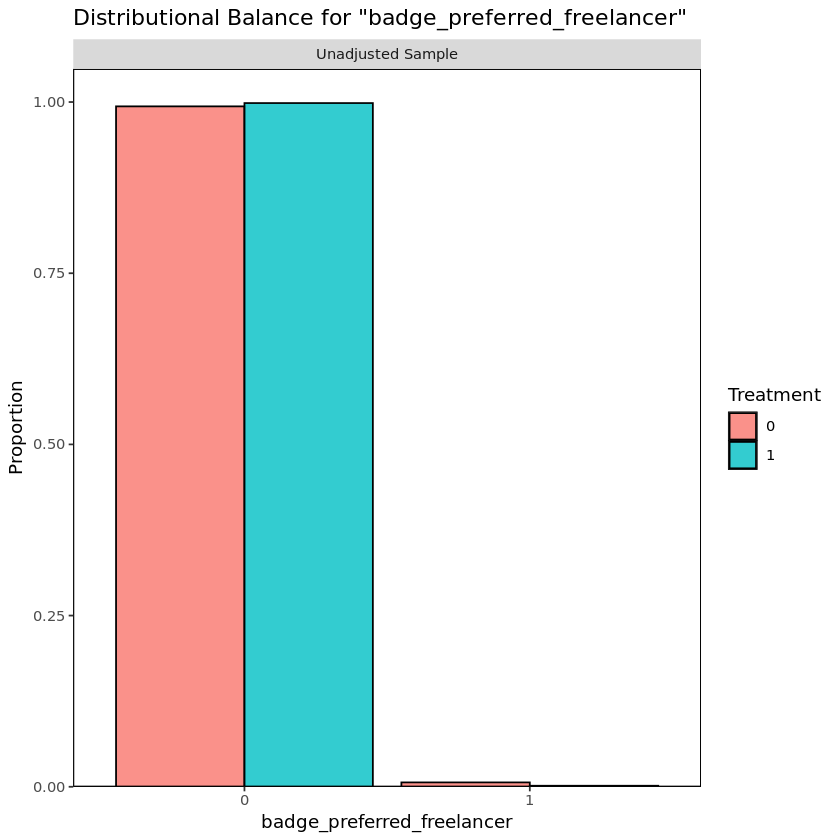

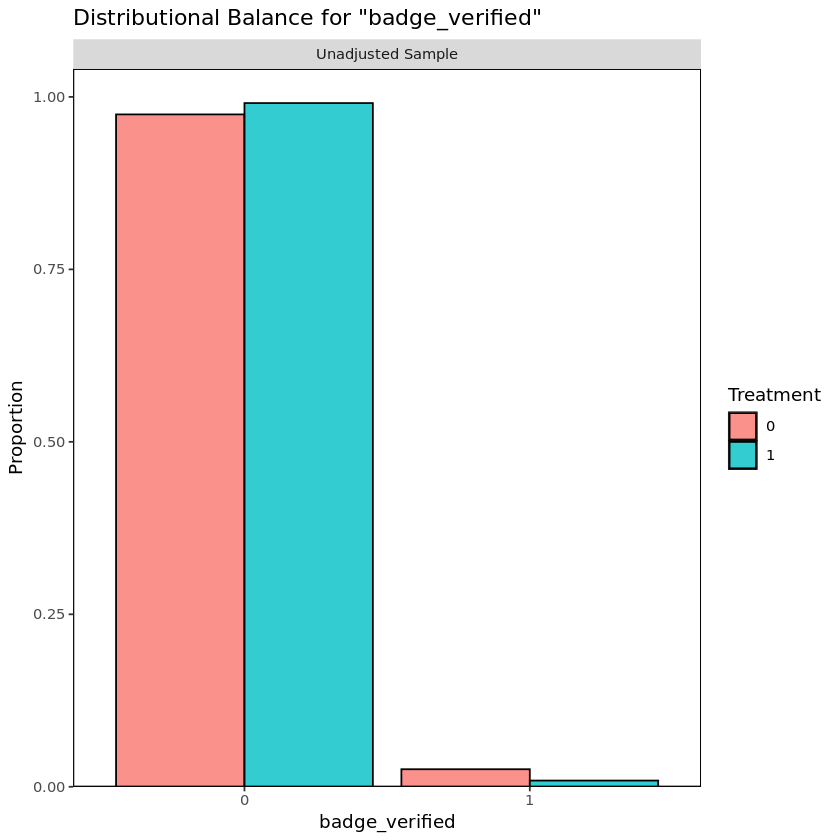

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=swe, var.name=c))
}  

### h. Matching for translators

In [ ]:
attach(translator)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0))

# estimate causal effect using weights
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)

# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, match.out=mout, nboots=1000)
summary(mb)

The following objects are masked from swe:

    avg_rating, badge_plus_membership, badge_preferred_freelancer,
    badge_verified, design_skills, engineering_skills,
    finance_accounting_skills, freelancer_certifications, gender,
    general_skill_certifications, hourly_rate, join_date_from_earliest,
    language_certifications, language_translation_skills,
    location_size, management_skills, marketing_business_skills,
    miscellaneous_skills, name, num_recommendations, num_reviews,
    pay_grade, pct_jobs_completed, pct_on_budget, pct_on_time,
    performance_arts_skills, programming_certifications, search_query,
    teaching_training_skills, technical_programming_skills,
    top_skill_category, top_skill_category_count,
    top_skill_category_encoded, verification_email_verified,
    verification_facebook_connected, verification_identity_verified,
    verification_payment_verified, verification_phone_verified,
    verification_preferred_freelancer, writing_skills


The following

                    Length Class  Mode     
BeforeMatching      16     -none- list     
AfterMatching       16     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    1     -none- character
BMsmallestVarNumber  1     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

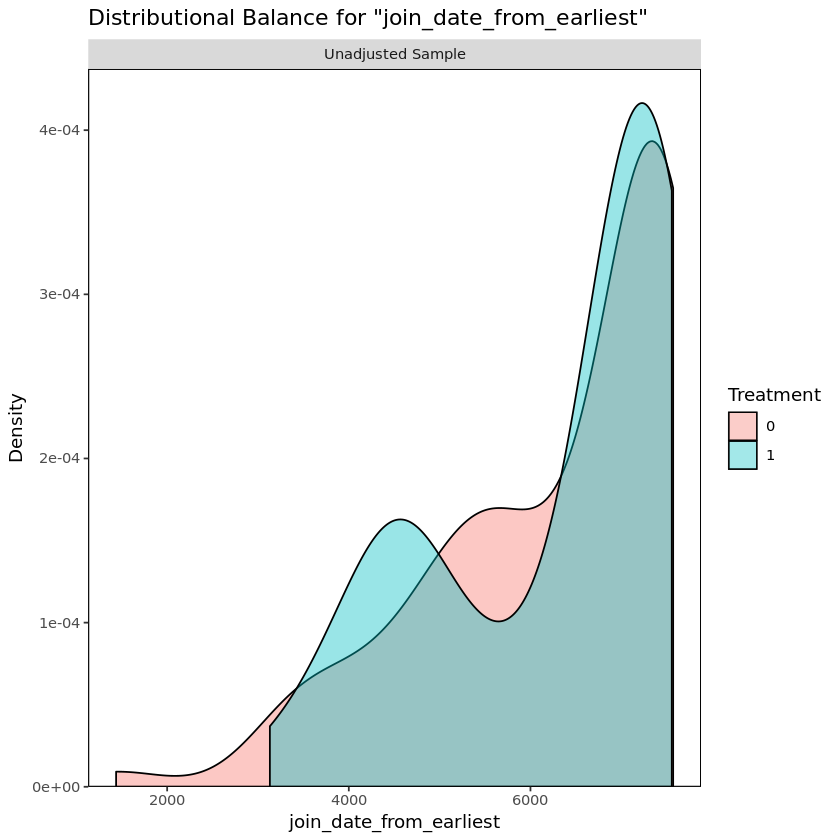

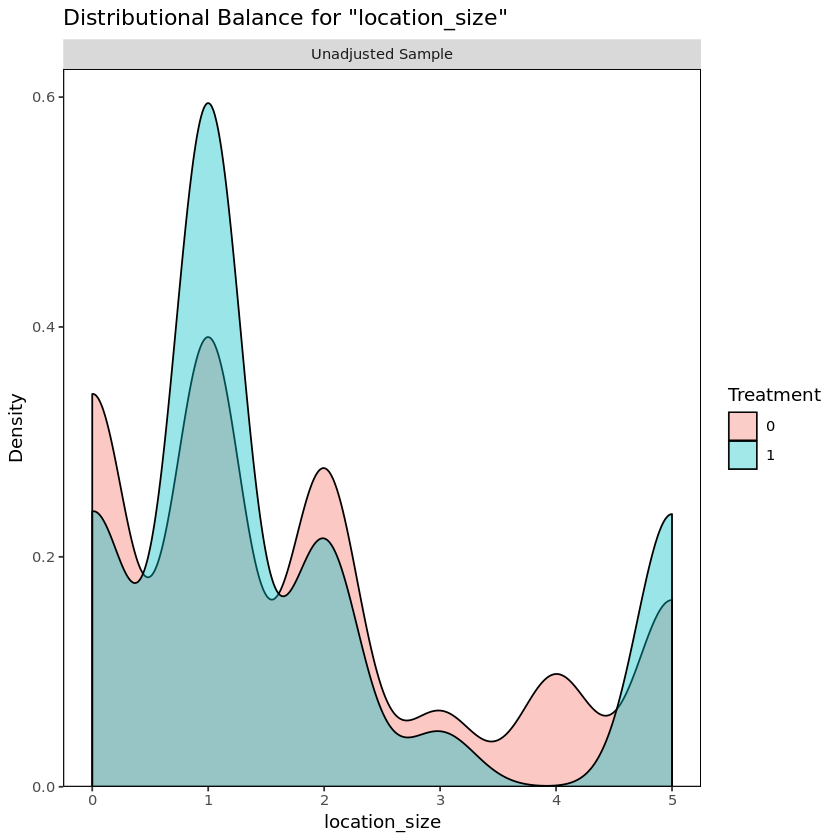

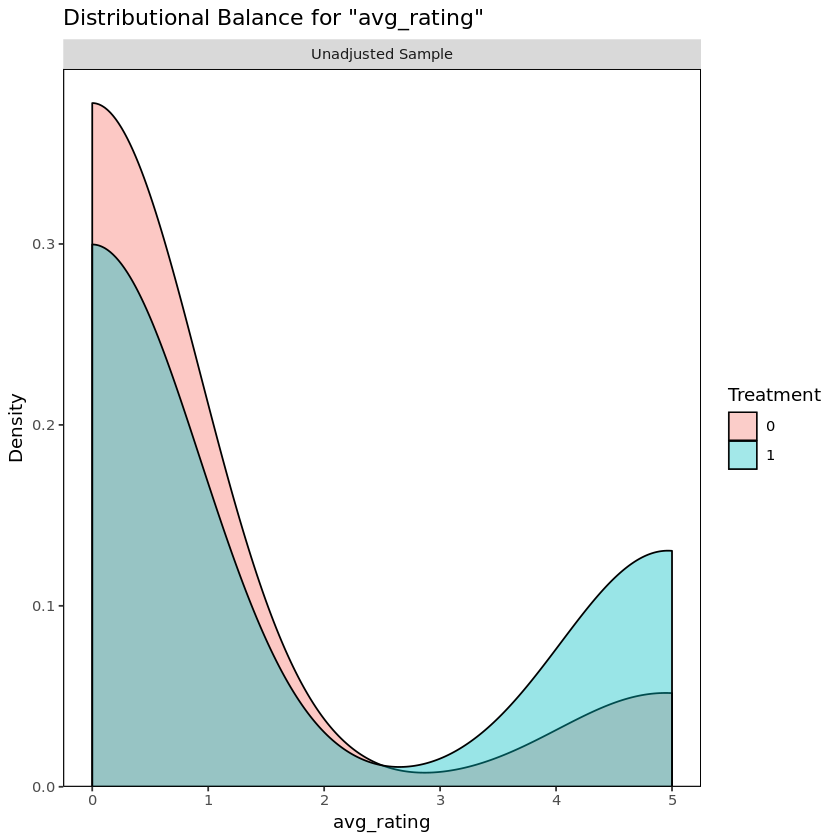

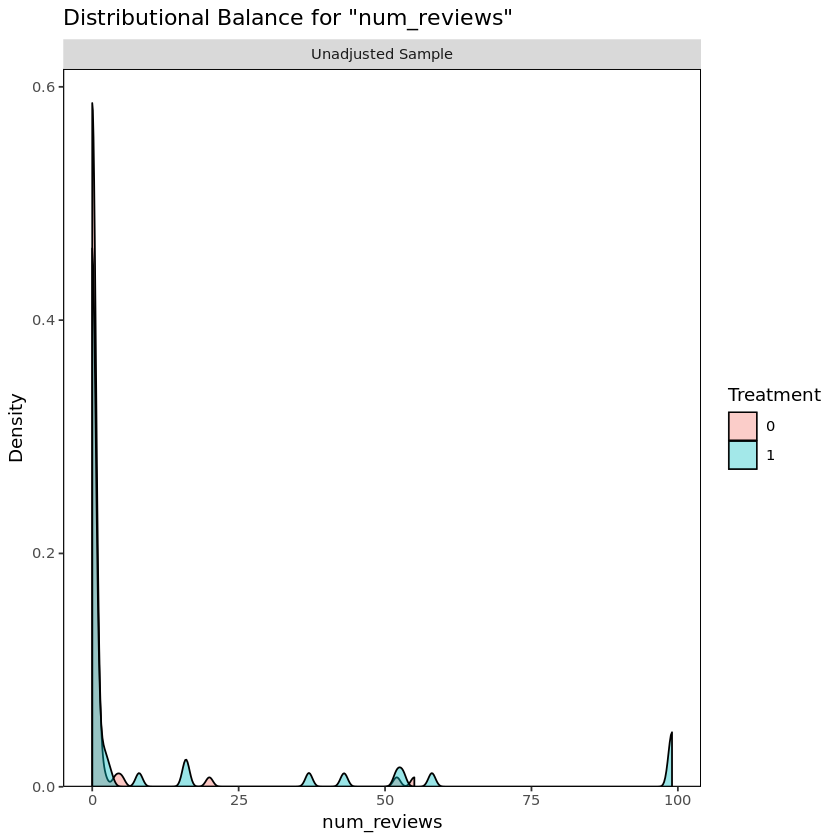

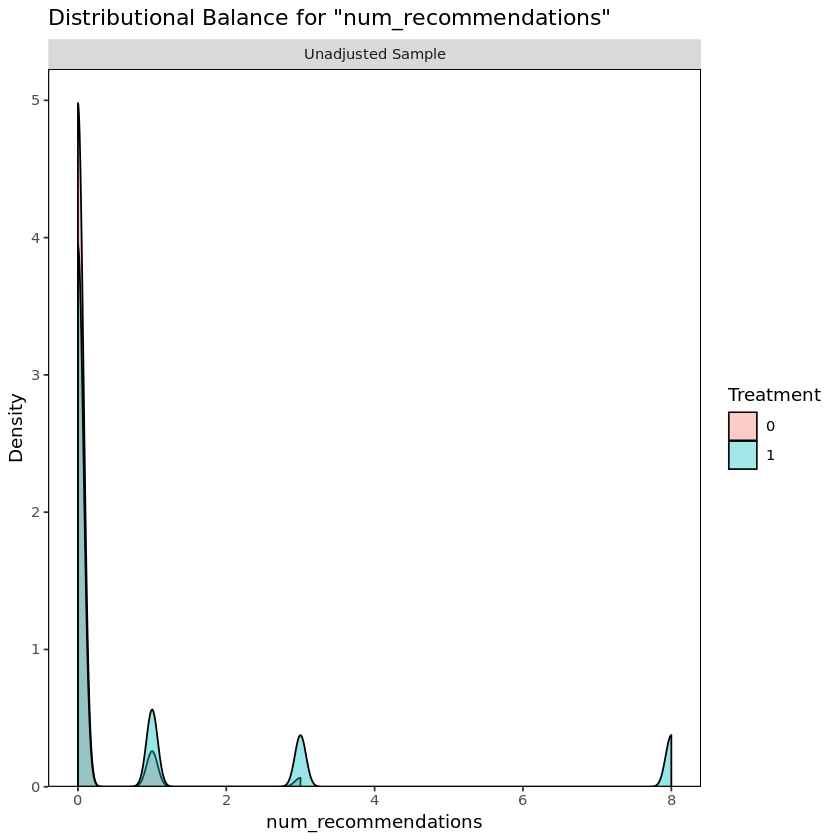

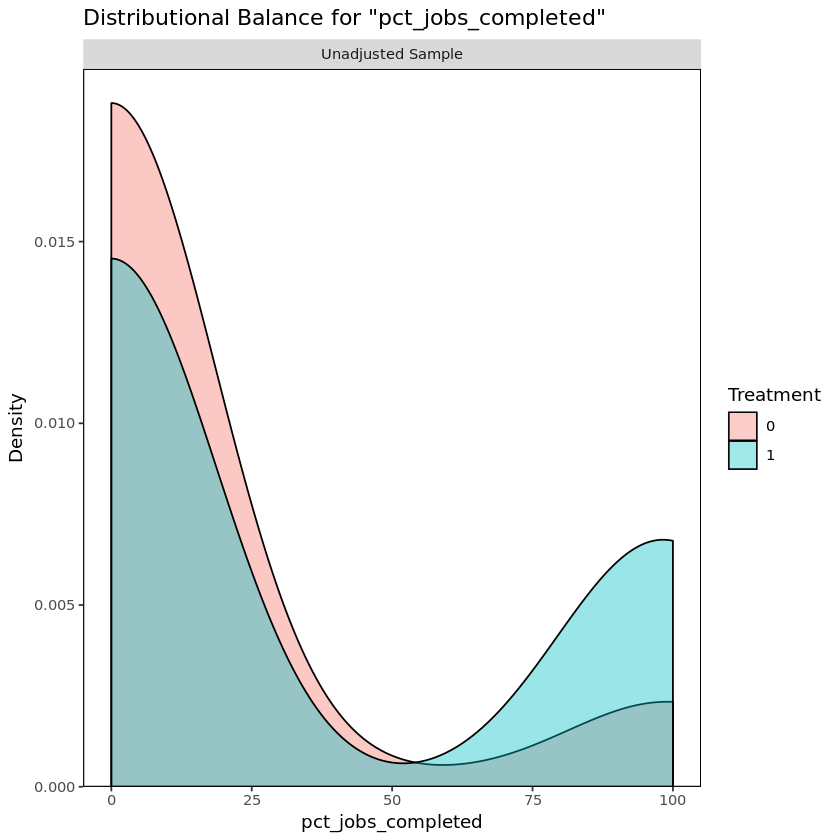

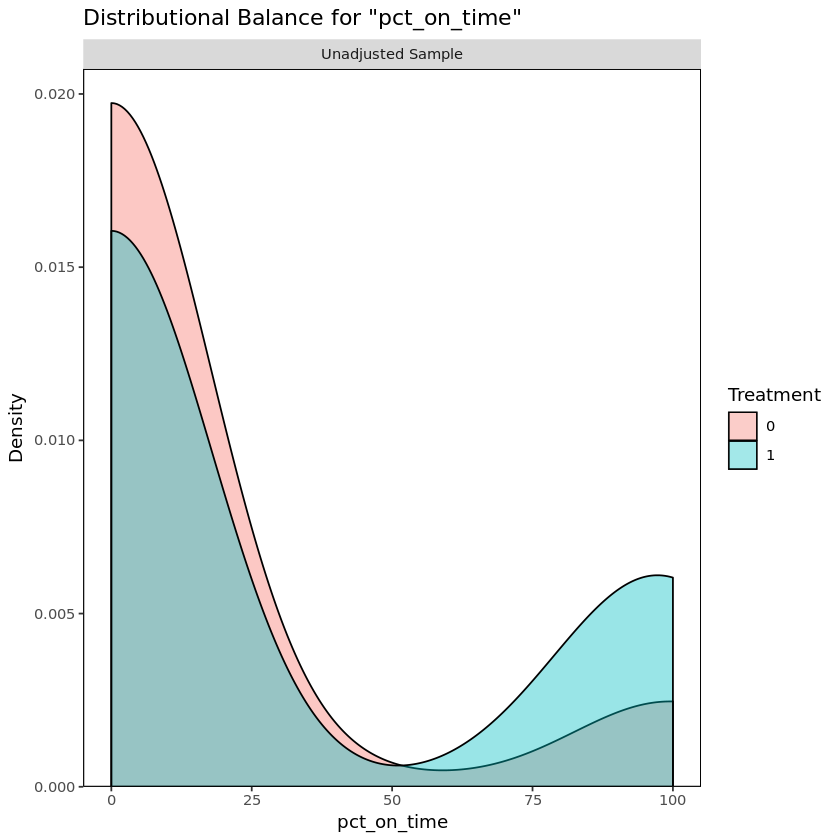

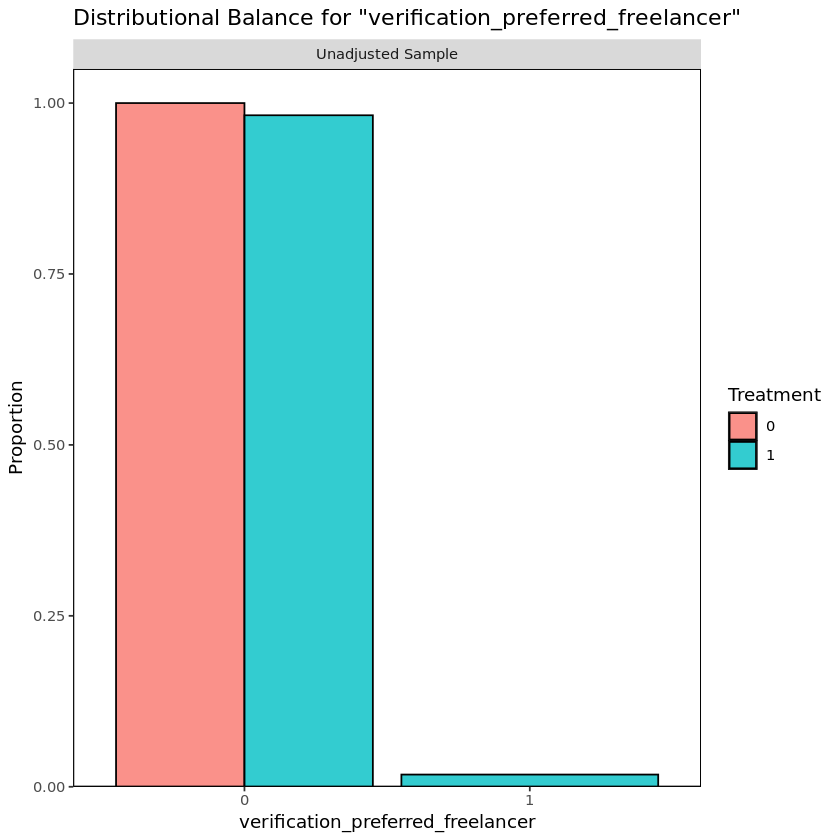

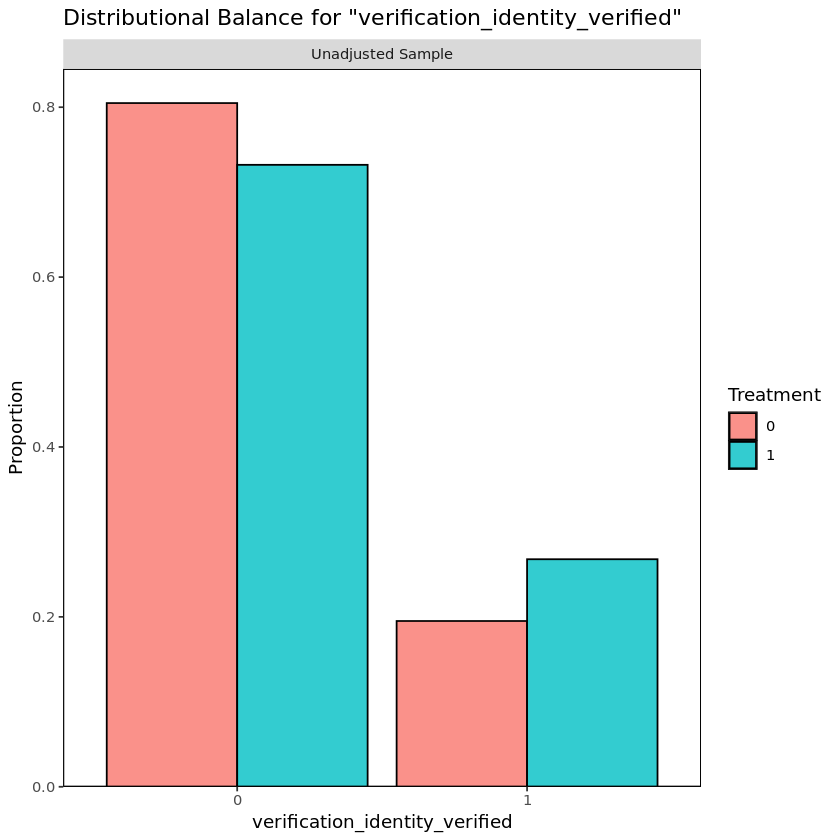

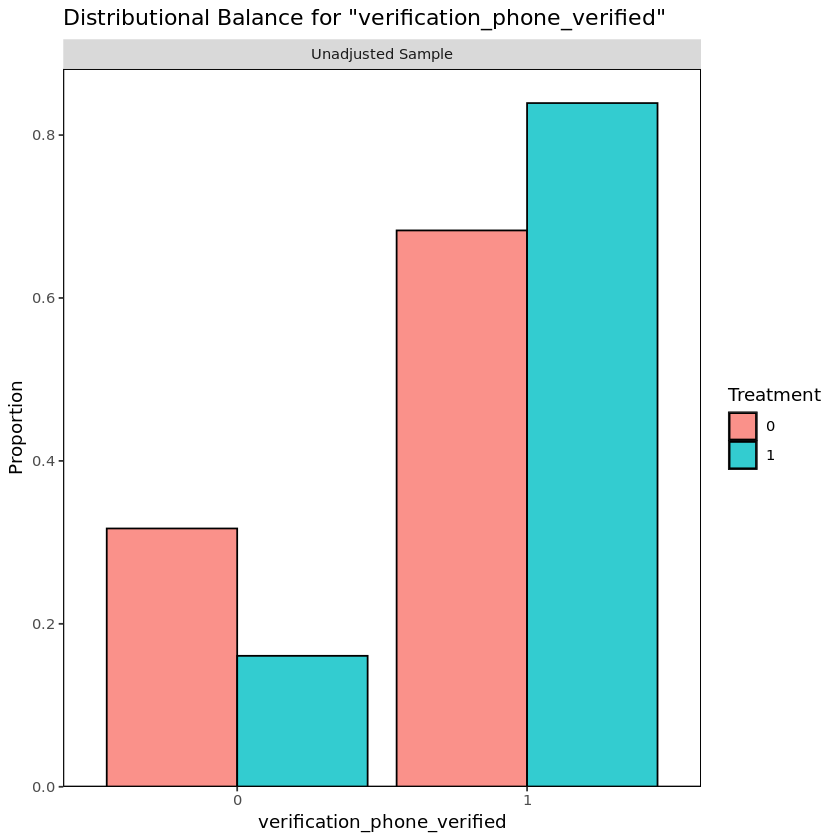

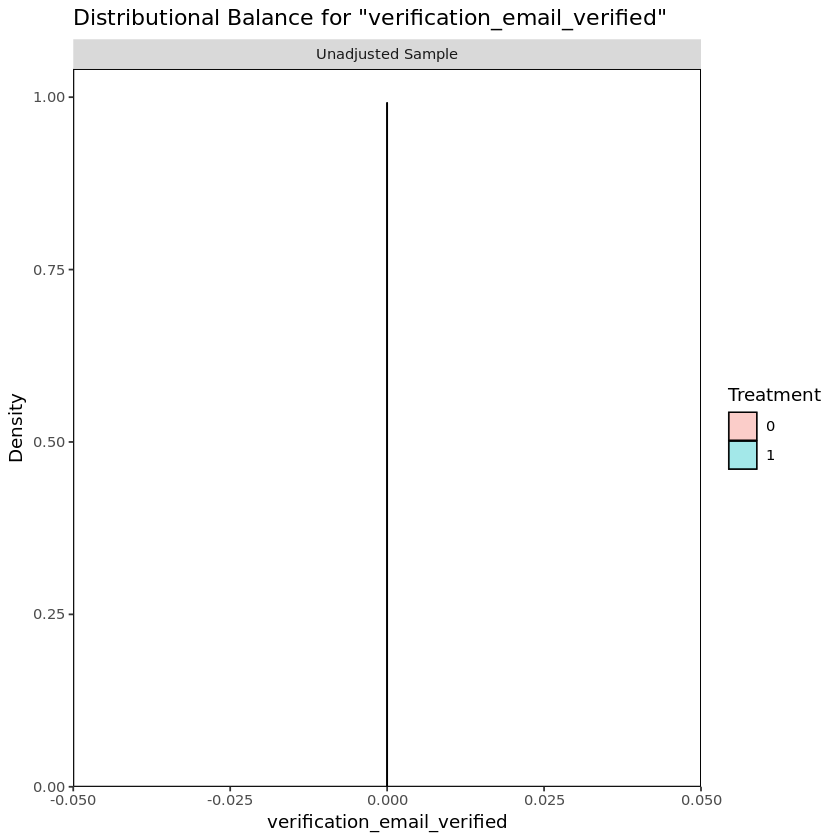

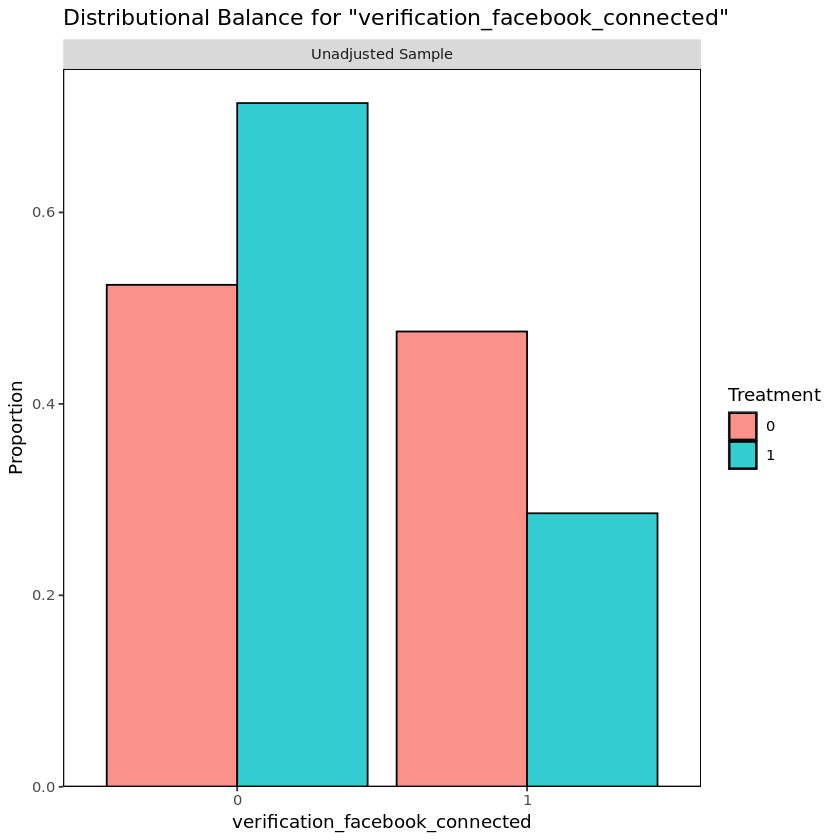

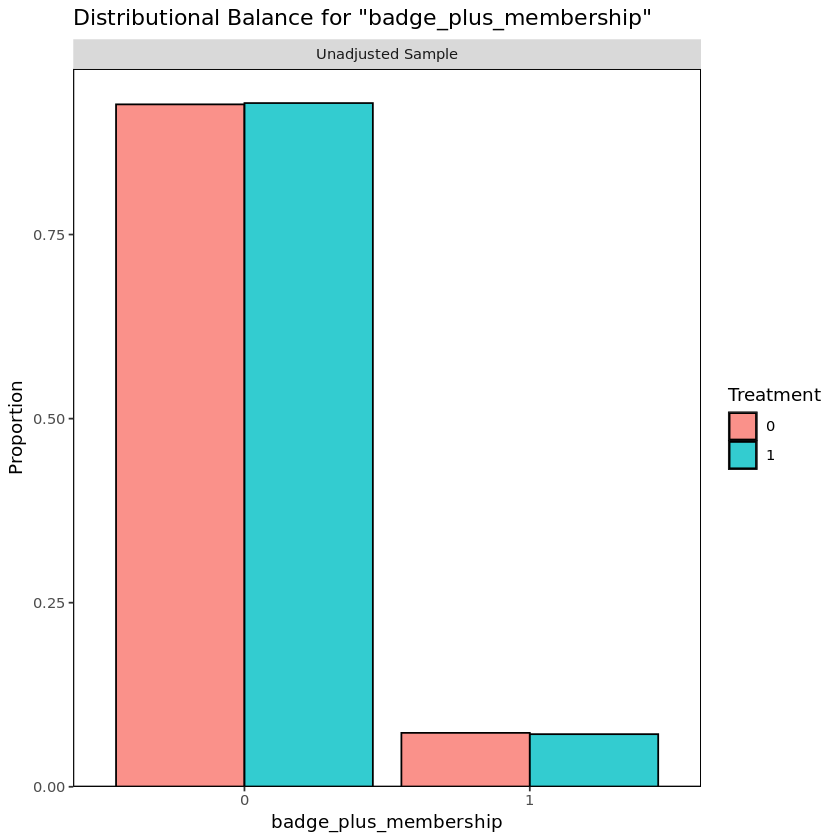

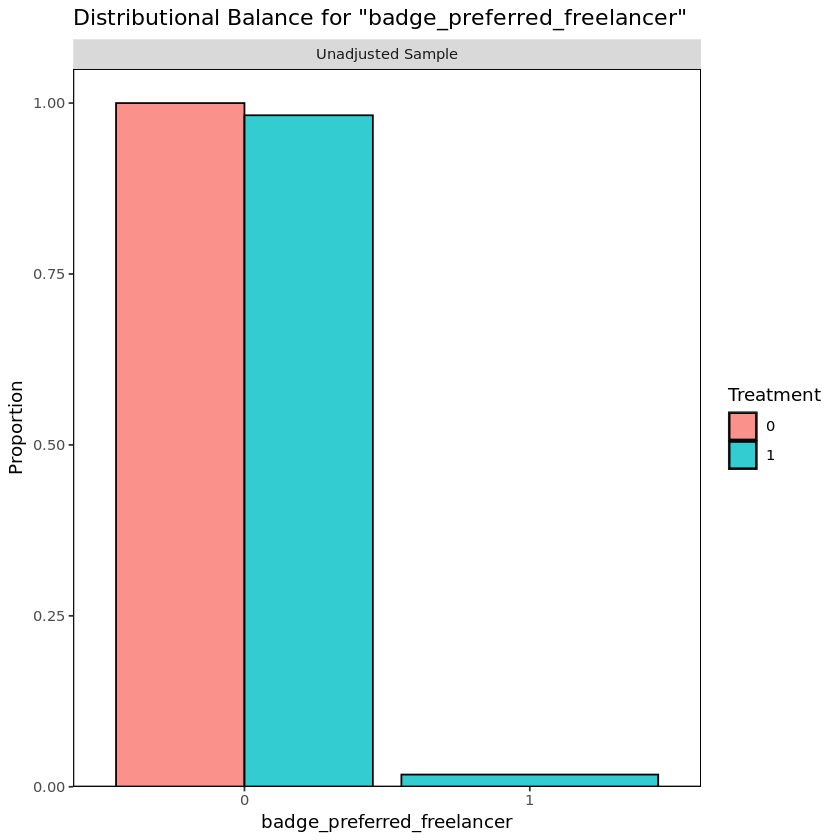

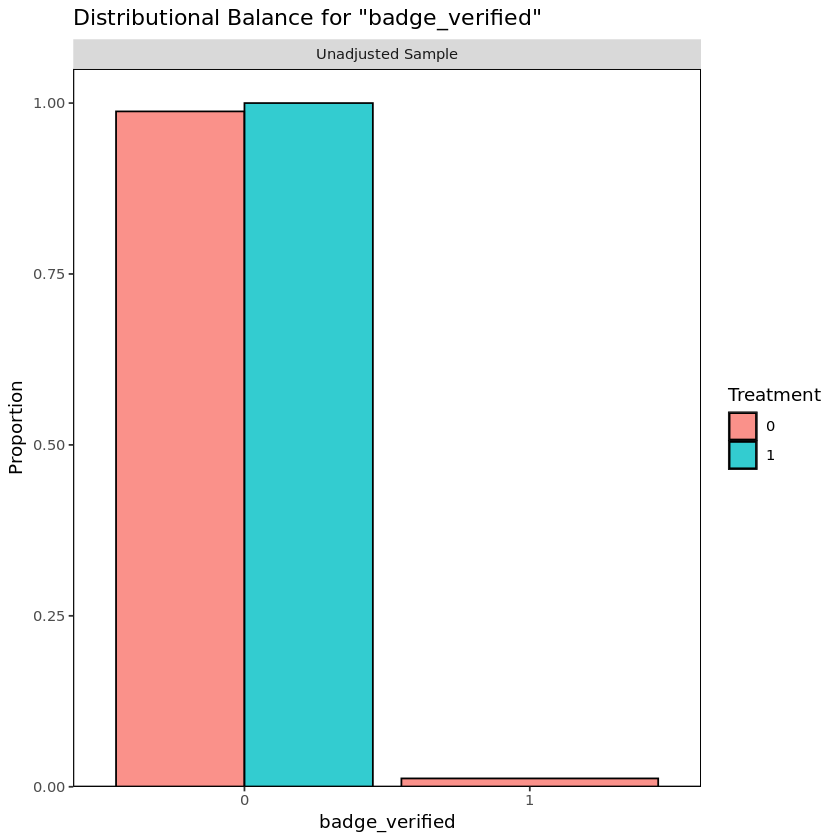

In [ ]:
# covariate balance plots
covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified, data=translator, var.name=c))
}  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>